In [103]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [104]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            print(i+1)

In [105]:
#train = pd.read_pickle('salida/nuevo2/SICK/TRAIN_2.csv_.pickle')

In [106]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entSimilitud,dicEntT,dicEntH,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
0,2,0.142857,0.000000,0.000000,2.418908,0.000000,0.857143,0.801784,0.000000,0.000000,...,0.661218,"{'group': '', 'kid': '', 'play': 'be,,', 'yard...","{'group': '', 'boy': '', 'yard': '', 'play': '...",0.000000,2.973557,4.676183,2.973557,4.676183,2.973557,CONTRADICTION
1,-1,0.375000,0.125000,0.000000,2.409212,0.000000,0.625000,0.668153,0.000000,0.000000,...,0.559689,"{'group': '', 'child': '', 'play': 'be,,', 'ho...","{'group': '', 'kid': '', 'play': 'be,,', 'yard...",3.240224,2.840224,4.888358,0.000000,4.915581,3.240224,CONTRADICTION
2,2,0.250000,0.000000,0.924640,2.220359,2.121928,0.750000,0.676123,4.007161,0.003346,...,0.686883,"{'young': '', 'boy': 'young', 'play': 'be,outd...","{'kid': '', 'play': 'be,outdoors,', 'man': '',...",3.321928,1.960964,4.399920,0.000000,4.399920,0.000000,ENTAILMENT
3,2,0.750000,0.000000,1.148936,2.315387,1.843752,0.375000,0.474342,3.987142,0.004614,...,0.566091,"{'kid': '', 'play': 'be,outdoors,', 'man': '',...","{'group': '', 'kid': '', 'play': 'be,,', 'yard...",4.218172,0.000000,4.702511,0.000000,4.647994,0.000000,CONTRADICTION
4,-1,0.875000,0.125000,1.048510,2.228679,1.979147,0.250000,0.267261,3.924470,0.004802,...,0.508552,"{'young': '', 'boy': 'young', 'play': 'be,outd...","{'group': '', 'kid': '', 'play': 'be,,', 'yard...",4.174688,0.000000,4.613856,0.000000,4.599705,0.000000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,2,1.000000,0.000000,1.359216,2.003877,0.503258,0.166667,0.235702,3.900165,0.005255,...,0.494729,"{'door': '', 'open': 'be,be,', 'man': ''}","{'bald': '', 'man': 'bald', 'band': '', 'play'...",3.406239,0.000000,4.011388,0.000000,3.283190,0.000000,CONTRADICTION
35,2,1.000000,0.000000,1.346294,2.081184,0.985228,0.000000,0.000000,3.824894,0.003925,...,0.530981,"{'boil': 'be,,', 'okra': '', 'pot': ''}","{'man': '', 'play': 'be,not,,,', 'drum': ''}",3.553763,0.000000,3.886147,0.000000,3.721163,0.000000,CONTRADICTION
36,-1,1.000000,0.166667,1.130096,2.098866,1.918554,0.000000,0.000000,3.925221,0.004793,...,0.283686,"{'man': '', 'singe': 'be,heartily,,,', 'play':...","{'bicyclist': '', 'hold': 'be,,', 'bike': '', ...",4.108695,2.750000,4.466211,0.000000,4.392591,0.000000,CONTRADICTION
37,2,0.666667,0.000000,1.298727,2.024862,1.224394,0.333333,0.235702,3.775651,0.004270,...,0.455021,"{'man': '', 'blue': '', 'have': '', 'yellow': ...","{'man': '', 'jump': 'be,,', 'rope': ''}",3.281036,0.000000,3.819583,0.000000,3.497375,2.503258,CONTRADICTION


In [107]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'pInflexionV', 'entSimilitud', 'dicEntT', 'dicEntH',
       'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2', 'H_grupo3',
       'h_k_grupo3', 'clases'],
      dtype='object')

In [108]:
indice=13
print(train.at[indice,'Texto'])
print(train.at[indice,'dicEntT'])
print(train.at[indice,'Hipotesis'])
print(train.at[indice,'dicEntH'])
print(train.at[indice,'clases'])

13    The player is dunking the basketball into the ...
13                   A man is playing a guitar on stage
13    A black person is running along a white stand ...
13    The man in the purple hat is operating a camer...
13                   Two young kids are eating corndogs
13                       A woman is not boiling shrimps
13                                  Some men are sawing
13               A woman is breaking two eggs in a bowl
13    The food on the trays isn't being eaten by the...
13         A person is strongly whisking eggs in a bowl
13                 The cat is playing with a watermelon
13            There is no little girl playing the piano
13    There is no person pouring olive oil into a po...
13      Different teams are playing football on a field
13                          A man is playing the guitar
13                              A dog is licking a baby
13                   Some racers are swimming in a lake
13           A boy is attentively looking at a c

In [109]:
train.at[5,'relacionesEncontradas']

5     Generalidad, Sinonimos: two-two |  Generalida...
5     Generalidad, Sinonimos: the-the |  Generalida...
5     Generalidad, Sinonimos: two-two |  Generalida...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: the-the |  Generalida...
5     Generalidad, Sinonimos: the-the |  Generalida...
5     Generalidad, Sinonimos: a-a |  Generalidad H,...
5     Generalidad, Sinonimos: woman-woman |  Genera...
5     Generalidad entailment: people-people |  Gene...
5     Generalidad, Sinonimos: be-be |  Generalidad,...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: a-a |  Generalidad, S...
5     Generalidad, Sinonimos: be-be |  Generalidad ...
5     Gene

<Axes: title={'center': 'pInflexionV'}, xlabel='clases'>

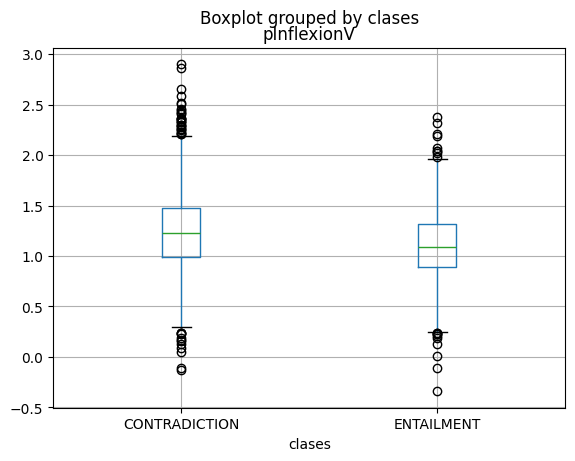

In [110]:
train.boxplot(by="clases",column=["pInflexionV"])

In [111]:
train=train.reset_index(drop=True)
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_TRAIN.csv")
train["clases"]=temp1["entailment_label"]

In [112]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'pInflexionV', 'entSimilitud', 'dicEntT', 'dicEntH',
       'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2', 'H_grupo3',
       'h_k_grupo3', 'clases'],
      dtype='object')

<Axes: title={'center': 'relation'}, xlabel='clases'>

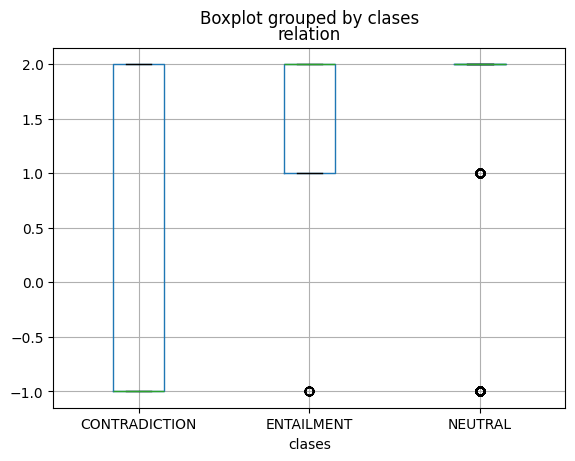

In [113]:
train.boxplot(by="clases",column=["relation"])

<Axes: title={'center': 'no_matcheadas'}, xlabel='clases'>

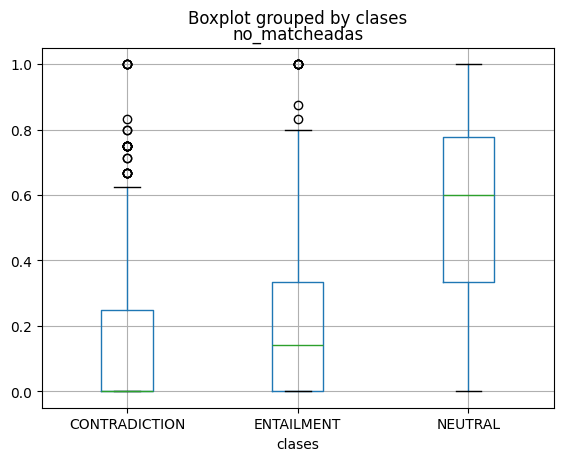

In [114]:
train.boxplot(by="clases",column=["no_matcheadas"])

<Axes: title={'center': 'distancias'}, xlabel='clases'>

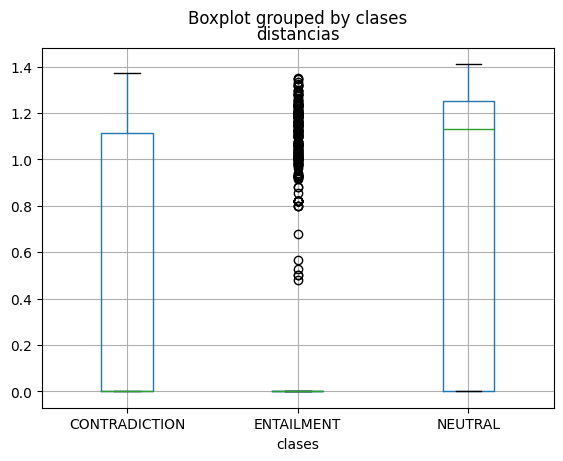

In [115]:
train.boxplot(by="clases",column=["distancias"])

<Axes: title={'center': 'entropia_total'}, xlabel='clases'>

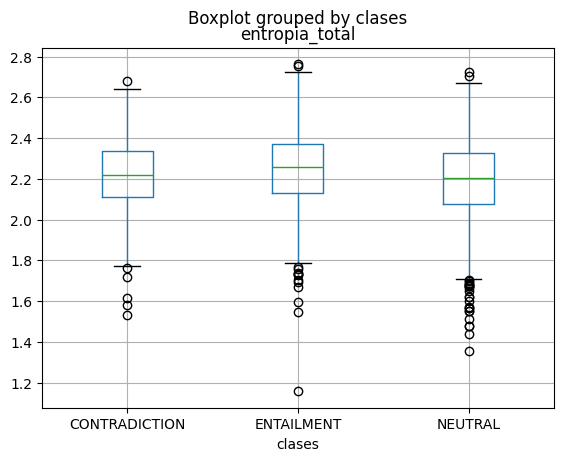

In [116]:
train.boxplot(by="clases",column=["entropia_total"])

<Axes: title={'center': 'entropias'}, xlabel='clases'>

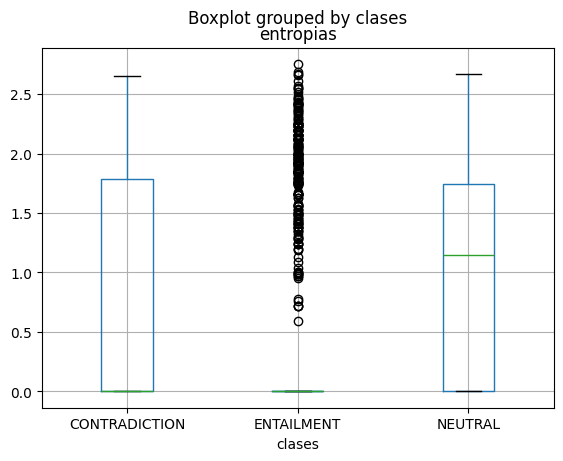

In [117]:
train.boxplot(by="clases",column=["entropias"])

<Axes: title={'center': 'jaccard'}, xlabel='clases'>

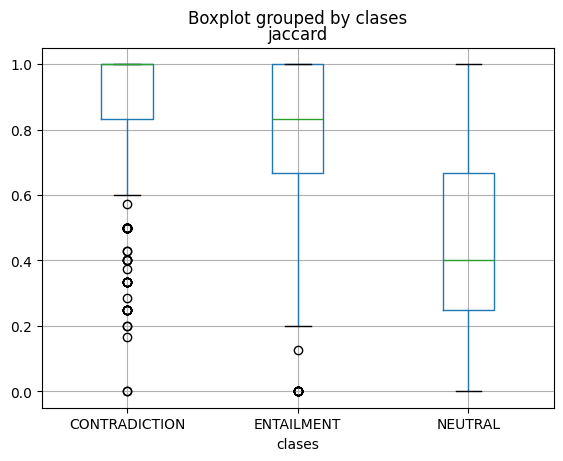

In [118]:
train.boxplot(by="clases",column=["jaccard"])

<Axes: title={'center': 'sumas'}, xlabel='clases'>

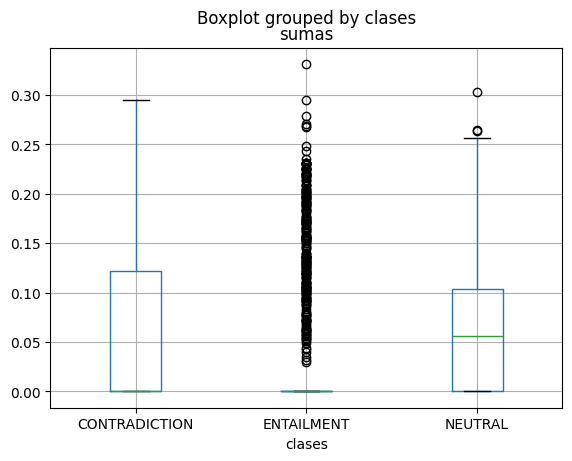

In [119]:
train.boxplot(by="clases",column=["sumas"])

<Axes: title={'center': 'mutinf'}, xlabel='clases'>

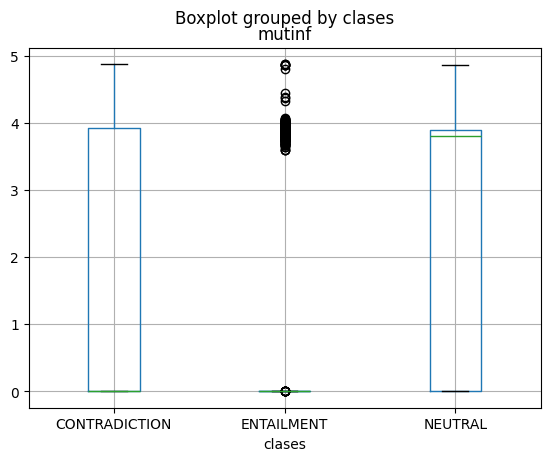

In [120]:
train.boxplot(by="clases",column=["mutinf"])

<Axes: title={'center': 'max_info_t'}, xlabel='clases'>

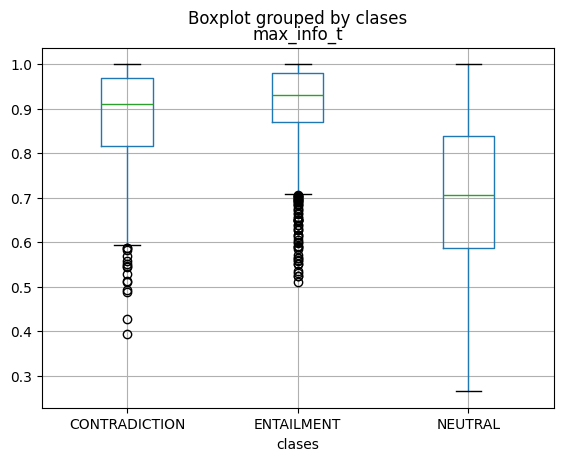

In [121]:
train.boxplot(by="clases",column=["max_info_t"])

<Axes: title={'center': 'max_info'}, xlabel='clases'>

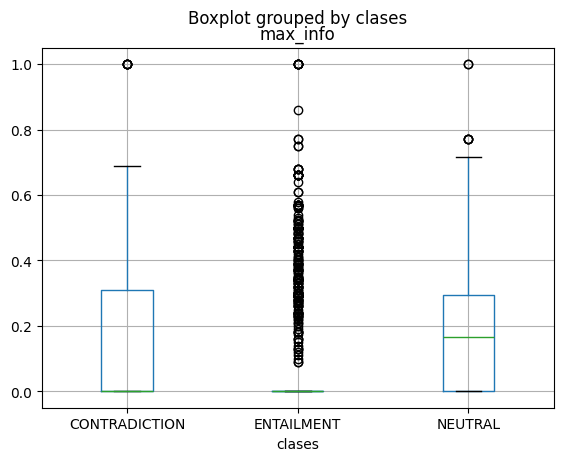

In [122]:
train.boxplot(by="clases",column=["max_info"])

<Axes: title={'center': 'entropias'}, xlabel='clases'>

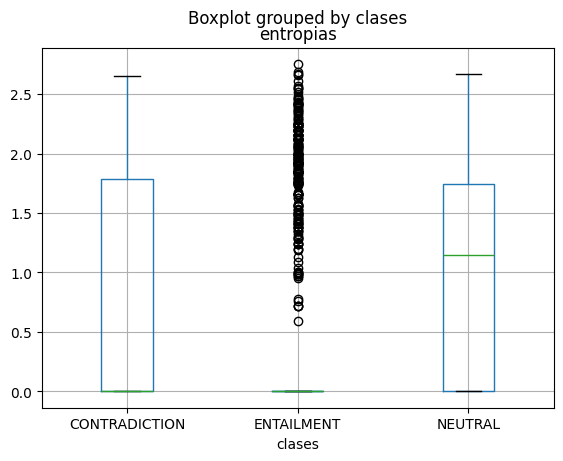

In [123]:
train.boxplot(by="clases",column=["entropias"])

<Axes: title={'center': 'nlp_semantics'}, xlabel='clases'>

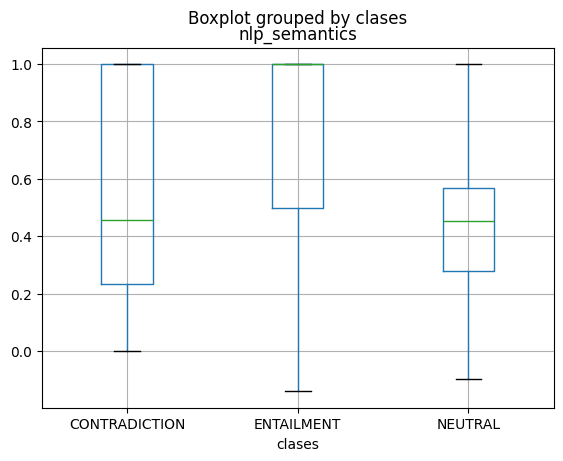

In [124]:
train.boxplot(by="clases",column=["nlp_semantics"])

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

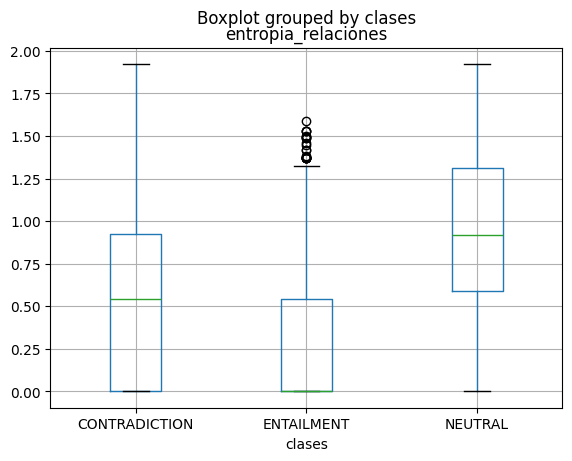

In [142]:
train.boxplot(by="clases",column=["entropia_relaciones"])

<Axes: title={'center': 'Jaro-Winkler_rit'}, xlabel='clases'>

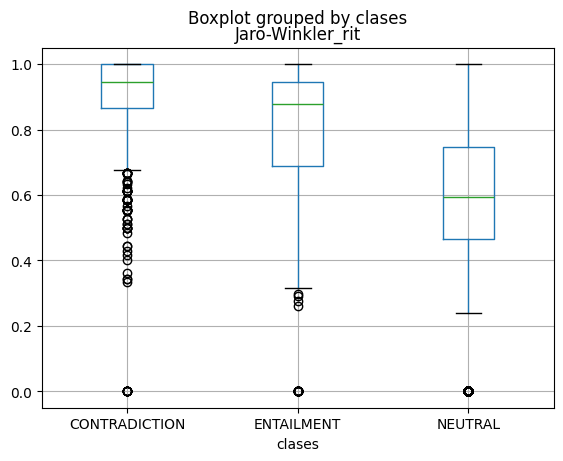

In [143]:
train.boxplot(by="clases",column=["Jaro-Winkler_rit"])

In [127]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'pInflexionV', 'entSimilitud', 'dicEntT', 'dicEntH',
       'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2', 'H_grupo3',
       'h_k_grupo3', 'clases'],
      dtype='object')

array([<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>,
       <Axes: title={'center': 'entSimilitud'}, xlabel='clases'>],
      dtype=object)

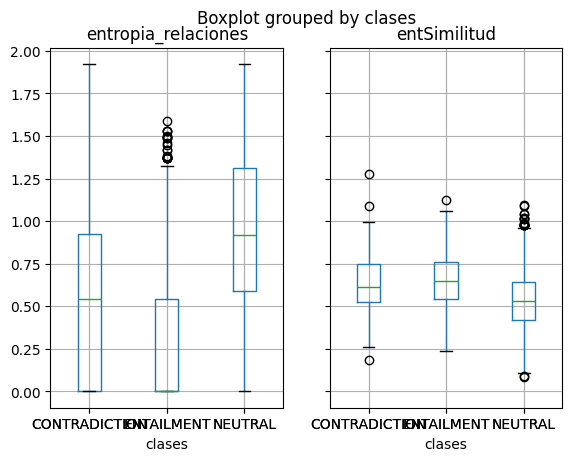

In [128]:
train.boxplot(by="clases",column=["entropia_relaciones","entSimilitud"])

In [16]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'pInflexionV', 'entSimilitud', 'dicEntT', 'dicEntH',
       'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2', 'H_grupo3',
       'h_k_grupo3', 'clases'],
      dtype='object')

array([<Axes: title={'center': 'h_k_grupo1'}, xlabel='clases'>,
       <Axes: title={'center': 'h_k_grupo2'}, xlabel='clases'>],
      dtype=object)

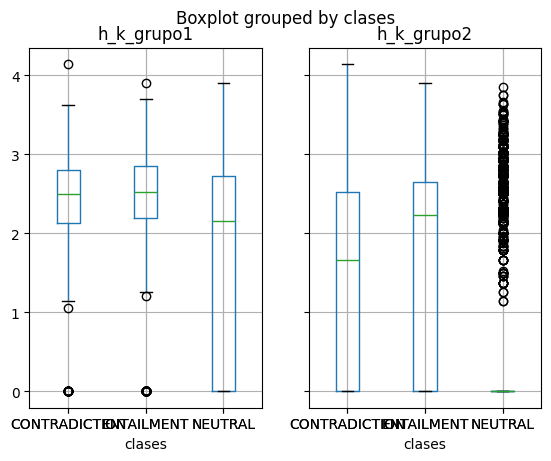

In [136]:
train.boxplot(by="clases",column=["h_k_grupo1","h_k_grupo2"])

<Axes: title={'center': 'h_k_grupo3'}, xlabel='clases'>

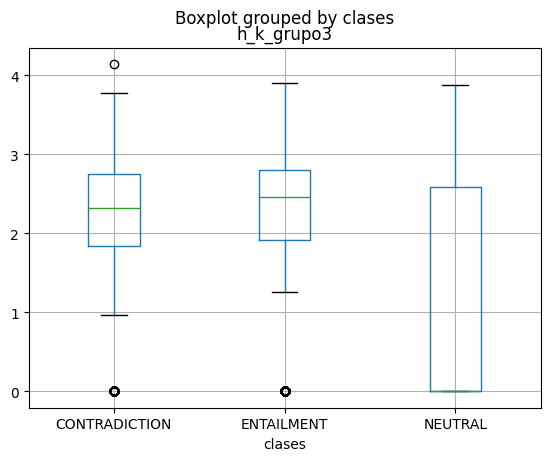

In [137]:
train.boxplot(by="clases",column=["h_k_grupo3"])

array([<Axes: title={'center': 'H_grupo1'}, xlabel='clases'>,
       <Axes: title={'center': 'H_grupo2'}, xlabel='clases'>],
      dtype=object)

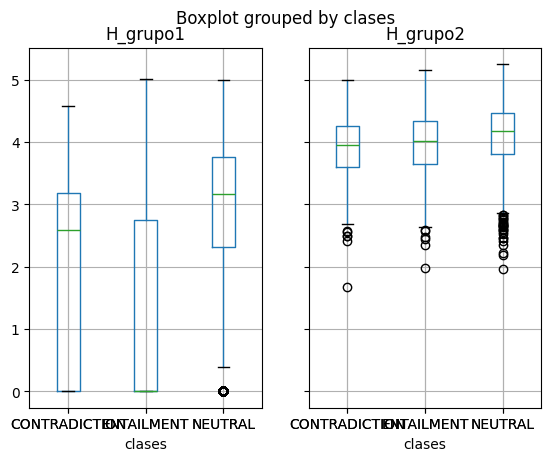

In [134]:
train.boxplot(by="clases",column=["H_grupo1","H_grupo2"])

<Axes: title={'center': 'entropias'}, xlabel='clases'>

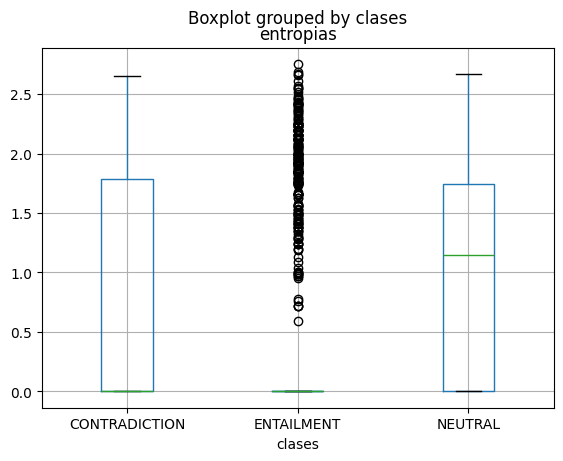

In [140]:
train.boxplot(by="clases",column=["entropias"])

In [144]:
Hsss=train[["entropia_total","entropias","H_grupo1","H_grupo2","H_grupo3","clases"]]
Hsss

,entropia_total,entropias,H_grupo1,H_grupo2,H_grupo3,clases
0,2.418908,0.000000,0.000000,4.676183,4.676183,NEUTRAL
1,2.409212,0.000000,3.240224,4.888358,4.915581,NEUTRAL
2,2.220359,2.121928,3.321928,4.399920,4.399920,ENTAILMENT
3,2.315387,1.843752,4.218172,4.702511,4.647994,NEUTRAL
4,2.228679,1.979147,4.174688,4.613856,4.599705,NEUTRAL
...,...,...,...,...,...,...
4434,2.003877,0.503258,3.406239,4.011388,3.283190,NEUTRAL
4435,2.081184,0.985228,3.553763,3.886147,3.721163,NEUTRAL
4436,2.098866,1.918554,4.108695,4.466211,4.392591,NEUTRAL
4437,2.024862,1.224394,3.281036,3.819583,3.497375,NEUTRAL


In [145]:
Hksss=train[["entropia_total","entropias","h_k_grupo1","h_k_grupo2","h_k_grupo3","clases"]]
Hksss

,entropia_total,entropias,h_k_grupo1,h_k_grupo2,h_k_grupo3,clases
0,2.418908,0.000000,2.973557,2.973557,2.973557,NEUTRAL
1,2.409212,0.000000,2.840224,0.000000,3.240224,NEUTRAL
2,2.220359,2.121928,1.960964,0.000000,0.000000,ENTAILMENT
3,2.315387,1.843752,0.000000,0.000000,0.000000,NEUTRAL
4,2.228679,1.979147,0.000000,0.000000,0.000000,NEUTRAL
...,...,...,...,...,...,...
4434,2.003877,0.503258,0.000000,0.000000,0.000000,NEUTRAL
4435,2.081184,0.985228,0.000000,0.000000,0.000000,NEUTRAL
4436,2.098866,1.918554,2.750000,0.000000,0.000000,NEUTRAL
4437,2.024862,1.224394,0.000000,0.000000,2.503258,NEUTRAL


<Axes: title={'center': 'H_grupo1'}, xlabel='clases'>

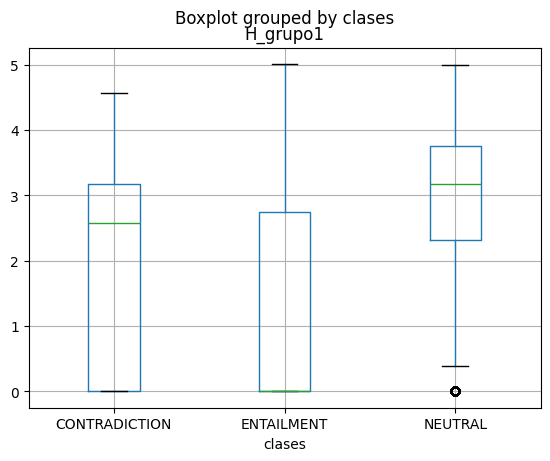

In [85]:
train.boxplot(by="clases",column=["H_grupo1"])

In [93]:
train["entroG1"]=train["entropia_total"]-train["H_grupo1"]
train["entroG2"]=train["entropia_total"]-train["H_grupo2"]
train["entroG3"]=train["entropia_total"]-train["H_grupo3"]

KeyError: 'Column not found: entroG1'

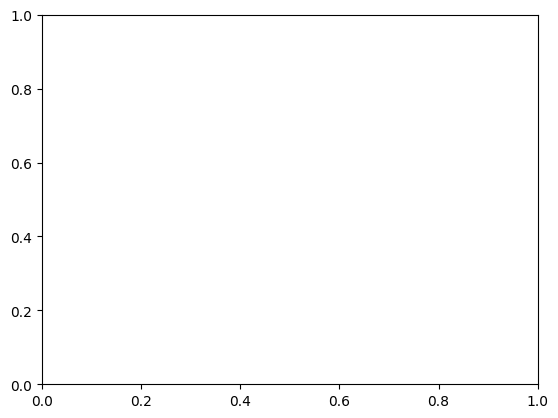

In [141]:
train.boxplot(by="clases",column=["entroG1"])

<Axes: title={'center': 'entroG2'}, xlabel='clases'>

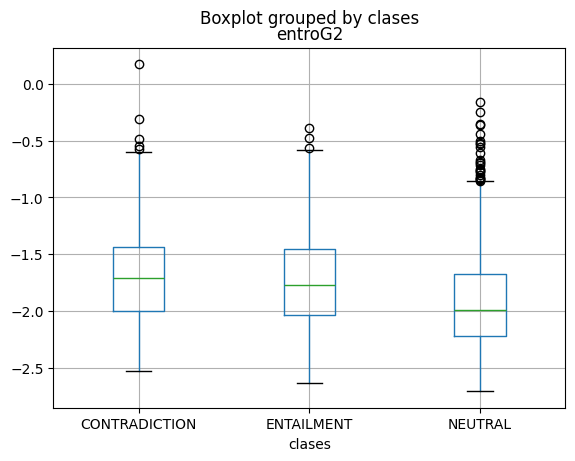

In [20]:
train.boxplot(by="clases",column=["entroG2"])

array([<Axes: title={'center': 'entropia_total'}, xlabel='clases'>,
       <Axes: title={'center': 'entropias'}, xlabel='clases'>],
      dtype=object)

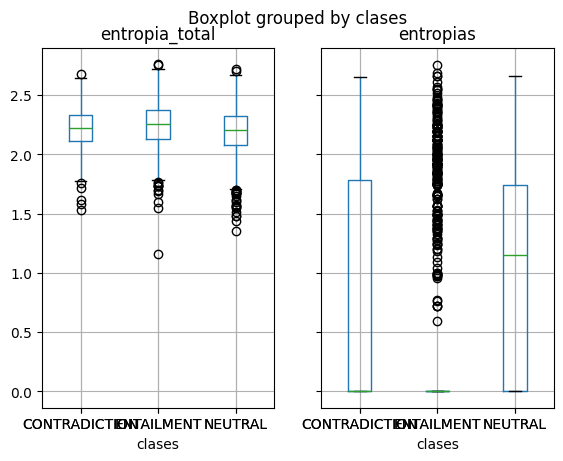

In [21]:
train.boxplot(by="clases",column=["entropia_total","entropias"])

In [32]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
train["mutinf"]=train["mutinf_t"]-train["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
train["max_info"]=train["max_info_t"]-train["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
train["entropias"]=train["entropia_total"]-train["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
train["sumas"]=train["sumas_t"]-train["sumas"]
train["list_m"]=train["list_m"]/train["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]

In [22]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases,entroG1,entroG2,entroG3
0,2,0.142857,0.000000,0.000000,2.094185,0.000000,0.857143,0.801784,0.000000,0.000000,...,0.000000,2.500000,4.069851,2.500000,4.069851,2.500000,NEUTRAL,2.094185,-1.975666,-1.975666
1,-1,0.375000,0.125000,0.000000,1.957972,0.000000,0.625000,0.668153,0.000000,0.000000,...,2.128085,2.235926,4.146006,0.000000,4.055923,2.128085,NEUTRAL,-0.170113,-2.188034,-2.097951
2,2,0.250000,0.000000,0.000000,2.162922,0.000000,0.750000,0.617213,0.000000,0.000000,...,0.000000,2.128085,3.785867,2.128085,3.785867,2.128085,ENTAILMENT,2.162922,-1.622945,-1.622945
3,2,0.750000,0.000000,1.346348,1.909126,0.970951,0.375000,0.433013,3.841058,0.006909,...,3.646439,0.000000,4.006198,0.000000,3.511080,0.000000,NEUTRAL,-1.737313,-2.097072,-1.601955
4,-1,0.875000,0.125000,1.330037,2.175833,0.985228,0.250000,0.267261,3.850918,0.005862,...,3.923252,0.000000,4.183302,0.000000,4.288307,0.000000,NEUTRAL,-1.747419,-2.007470,-2.112475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2,1.000000,0.000000,1.352706,0.944489,0.811278,0.166667,0.235702,3.786475,0.006455,...,1.780672,0.000000,2.362740,0.000000,2.362740,0.000000,NEUTRAL,-0.836184,-1.418252,-1.418252
4435,2,1.000000,0.000000,1.373320,0.811278,0.811278,0.000000,0.000000,3.779084,0.008525,...,2.418296,0.000000,2.418296,0.000000,2.418296,0.000000,NEUTRAL,-1.607018,-1.607018,-1.607018
4436,-1,1.000000,0.166667,1.263298,1.481188,1.156780,0.000000,0.000000,3.787387,0.006522,...,2.646439,1.921928,3.372254,0.000000,3.372254,0.000000,NEUTRAL,-1.165251,-1.891066,-1.891066
4437,2,0.666667,0.000000,1.298727,1.500272,1.459148,0.333333,0.223607,3.685267,0.004270,...,2.251629,0.000000,2.614369,0.000000,2.614369,0.000000,NEUTRAL,-0.751357,-1.114097,-1.114097


In [23]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases', 'entroG1', 'entroG2', 'entroG3'],
      dtype='object')

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

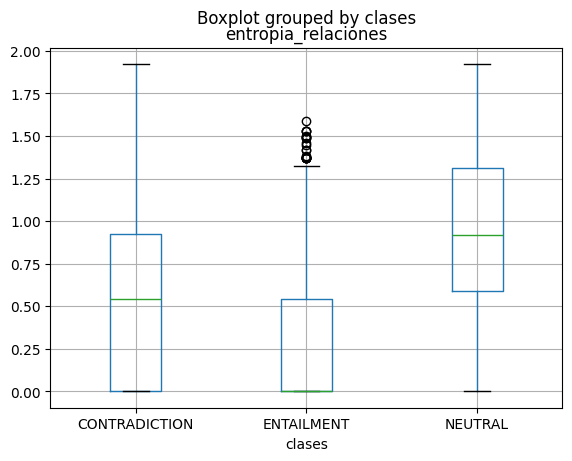

In [22]:
train.boxplot(by="clases",column=["entropia_relaciones"])

array([<Axes: title={'center': 'sumas'}, xlabel='clases'>,
       <Axes: title={'center': 'sumas_t'}, xlabel='clases'>], dtype=object)

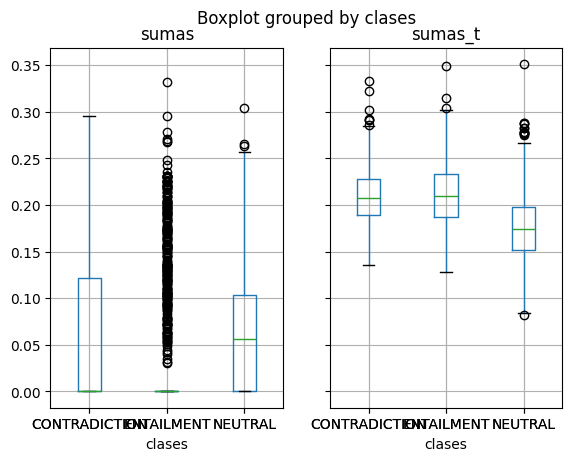

In [23]:
train.boxplot(by="clases",column=["sumas","sumas_t"])

array([<Axes: title={'center': 'overlap_ent'}, xlabel='clases'>,
       <Axes: title={'center': 'jaccard'}, xlabel='clases'>], dtype=object)

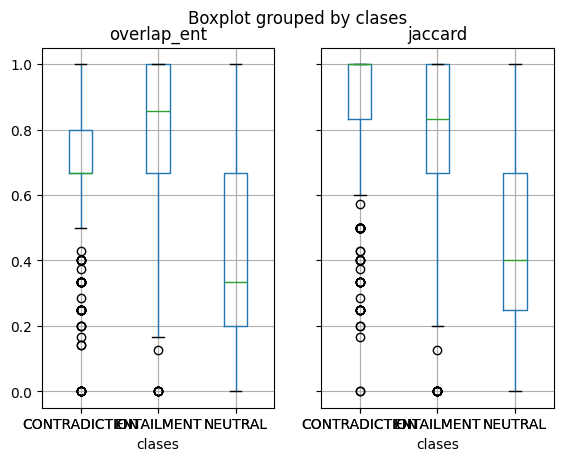

In [24]:
train.boxplot(by="clases",column=["overlap_ent","jaccard"])

# VIF

In [7]:
# MLR and Logistic Regession model fitting
# VIF computation
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
def calculate_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in  range(X.shape[1])]
  return(vif)

In [9]:
X_p = train.iloc[:,:-1]
calculate_vif(X_p)

,variables,VIF
0,relation,6.284996
1,no_matcheadas,42.213939
2,contradiction,10.173868
3,distancias,449.929984
4,entropia_total,3.019517
5,entropias,11.603344
6,jaccard,4.848800
7,simBoW,21.994862
8,mutinf,570.889432
9,mearts,12.980538


In [10]:
entail_train=train[train["clases"]=="ENTAILMENT"]
neutral_train=train[train["clases"]=="NEUTRAL"]
contradiction_train=train[train["clases"]=="CONTRADICTION"]
entail_train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
2,2,0.250000,0.0,0.000000,2.176234,2.176234,0.400000,0.617213,4.551917,0.000000,...,0.000000,5,0.000,7,0.815873,0.000000,0,0,0.750000,ENTAILMENT
11,1,0.000000,0.0,0.000000,2.752715,2.752715,1.000000,1.000000,4.682331,0.000000,...,0.000000,6,0.000,6,0.722222,0.000000,0,0,1.000000,ENTAILMENT
15,2,0.250000,0.0,0.000000,2.454773,2.454773,0.666667,0.670820,4.519764,0.000000,...,0.721928,5,0.000,6,0.783333,0.000000,0,0,0.750000,ENTAILMENT
19,2,0.333333,0.0,0.000000,1.622556,1.622556,0.666667,0.666667,4.563081,0.000000,...,0.000000,4,0.000,4,0.944444,0.000000,0,0,0.666667,ENTAILMENT
27,2,0.250000,0.0,0.000000,1.949351,1.949351,0.750000,0.676123,4.551264,0.000000,...,0.650022,6,0.000,8,0.620635,0.000000,0,0,0.750000,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4318,2,0.666667,0.0,0.000000,2.183894,2.183894,0.250000,0.204124,4.173215,0.000000,...,0.000000,3,0.000,8,0.486111,0.000000,0,0,0.333333,ENTAILMENT
4325,2,0.750000,0.0,0.000000,2.356475,2.356475,0.333333,0.166667,4.144079,0.000000,...,0.811278,4,0.000,9,0.490741,0.000000,0,0,0.250000,ENTAILMENT
4326,2,0.500000,0.0,0.000000,2.277936,2.277936,0.666667,0.333333,4.330568,0.000000,...,0.811278,4,0.000,9,0.574074,0.000000,0,0,0.500000,ENTAILMENT
4330,2,0.333333,0.0,1.273604,2.070981,0.611833,1.000000,0.816497,0.496911,0.004733,...,1.061278,8,0.125,6,0.682540,0.492146,0,0,0.666667,ENTAILMENT


In [11]:
X_e = entail_train.iloc[:,:-1]
calculate_vif(X_e)

/home/david/anaconda3/envs/rit/lib/python3.9/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


,variables,VIF
0,relation,4.351251
1,no_matcheadas,271.727081
2,contradiction,3.440233
3,distancias,707.797792
4,entropia_total,13.721181
5,entropias,31.562343
6,jaccard,2.976005
7,simBoW,10.422150
8,mutinf,842.344945
9,mearts,19.322793


In [12]:
neutral_train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.142857,0.000000,0.000000,2.096701,2.096701,0.800000,0.801784,4.584342,0.000000,...,0.000000,7,0.000000,8,0.785714,0.000000,0,0,0.857143,NEUTRAL
1,-1,0.285714,0.142857,0.000000,1.912939,1.912939,0.333333,0.668153,4.385955,0.000000,...,0.543564,8,0.000000,7,0.910714,0.000000,0,0,0.571429,NEUTRAL
3,2,0.714286,0.000000,1.346348,1.909126,1.027835,0.333333,0.433013,0.327421,0.006909,...,1.500000,8,0.250000,5,0.625000,0.530505,0,0,0.285714,NEUTRAL
4,2,0.857143,0.000000,1.330037,2.183393,1.198164,0.166667,0.267261,0.209238,0.005862,...,1.836592,8,0.250000,7,0.434524,0.459976,0,0,0.142857,NEUTRAL
5,2,0.666667,0.000000,1.351741,1.729574,0.811278,0.333333,0.408248,0.392981,0.012137,...,1.500000,4,0.250000,3,0.611111,0.748371,0,0,0.333333,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2,1.000000,0.000000,1.352706,1.052941,0.241663,0.200000,0.235702,0.137959,0.006455,...,0.918296,6,0.666667,3,0.500000,0.083317,0,0,0.000000,NEUTRAL
4435,2,1.000000,0.000000,1.373320,1.384432,0.000000,0.000000,0.000000,0.000000,0.008525,...,0.000000,4,1.000000,3,0.000000,0.000000,0,1,0.000000,NEUTRAL
4436,-1,1.000000,0.166667,1.263298,1.687640,0.316689,0.000000,0.000000,-0.044869,0.006522,...,0.918296,6,0.333333,5,0.288889,0.210428,0,0,0.000000,NEUTRAL
4437,2,0.666667,0.000000,1.298727,1.410848,-0.048300,0.333333,0.223607,0.409705,0.004270,...,0.918296,3,0.333333,6,0.483333,0.207085,0,0,0.333333,NEUTRAL


In [13]:
X_n = neutral_train.iloc[:,:-1]
calculate_vif(X_n)

,variables,VIF
0,relation,6.433041
1,no_matcheadas,27.681564
2,contradiction,8.791443
3,distancias,350.517737
4,entropia_total,2.498699
5,entropias,10.295622
6,jaccard,4.198966
7,simBoW,18.363626
8,mutinf,440.875194
9,mearts,11.054103


In [14]:
X_c = contradiction_train.iloc[:,:-1]
calculate_vif(X_c)

,variables,VIF
0,relation,9.821702
1,no_matcheadas,69.332633
2,contradiction,45.267650
3,distancias,585.959414
4,entropia_total,4.569375
5,entropias,8.649492
6,jaccard,3.487146
7,simBoW,17.093250
8,mutinf,636.621772
9,mearts,15.795986


In [15]:
train.describe()

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
count,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,...,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000,4439.000000
mean,1.213336,0.400183,0.059836,0.535771,1.996702,1.474212,0.548487,0.589843,2.749421,0.002421,...,0.071187,0.570584,4.753773,0.145766,4.901104,0.682137,0.226662,0.042127,0.048209,0.559665
std,1.184717,0.319605,0.126465,0.633021,0.376755,0.773670,0.309419,0.310121,2.063032,0.003340,...,0.261511,0.575295,1.821327,0.205189,1.864832,0.260569,0.361825,0.200901,0.214232,0.311113
min,-1.000000,0.000000,0.000000,0.000000,0.000000,-0.415037,0.000000,0.000000,-0.940803,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.125000,0.000000,0.000000,1.794737,0.748488,0.333333,0.333333,0.380758,0.000000,...,0.000000,0.000000,3.000000,0.000000,3.000000,0.533333,0.000000,0.000000,0.000000,0.333333
50%,2.000000,0.333333,0.000000,0.000000,2.040224,1.713119,0.666667,0.666667,4.203370,0.000000,...,0.000000,0.650022,4.000000,0.000000,5.000000,0.722222,0.000000,0.000000,0.000000,0.666667
75%,2.000000,0.666667,0.000000,1.285544,2.250000,2.124029,0.750000,0.866025,4.590860,0.005098,...,0.000000,0.970951,6.000000,0.250000,6.000000,0.916667,0.370344,0.000000,0.000000,0.750000
max,2.000000,1.000000,1.000000,1.458625,3.101410,3.101410,1.000000,1.000000,4.842156,0.044770,...,2.000000,2.000000,14.000000,1.000000,14.000000,1.000000,2.321928,1.000000,1.000000,1.000000


In [16]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [17]:
train[(train["relation"]==1) & (train["clases"]=="ENTAILMENT")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
11,1,0.0,0.0,0.0,2.752715,2.752715,1.00,1.000000,4.682331,0.0,...,0.0,6,0.0,6,0.722222,0.0,0,0,1.0,ENTAILMENT
42,1,0.0,0.0,0.0,1.791737,1.791737,0.75,0.666667,4.535674,0.0,...,0.0,5,0.0,5,0.944444,0.0,0,0,1.0,ENTAILMENT
54,1,0.0,0.0,0.0,1.825011,1.825011,1.00,0.866025,4.724540,0.0,...,0.0,3,0.0,4,0.916667,0.0,0,0,1.0,ENTAILMENT
60,1,0.0,0.0,0.0,1.939471,1.939471,0.75,1.000000,4.719276,0.0,...,0.0,5,0.0,5,0.600000,0.0,0,0,1.0,ENTAILMENT
78,1,0.0,0.0,0.0,2.608695,2.608695,0.75,0.894427,4.740391,0.0,...,0.0,4,0.0,5,0.933333,0.0,0,0,1.0,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,1,0.0,0.0,0.0,2.103377,2.103377,0.80,0.857143,4.578054,0.0,...,0.0,7,0.0,7,0.849206,0.0,0,0,1.0,ENTAILMENT
4260,1,0.0,0.0,0.0,1.810699,1.810699,1.00,1.000000,4.745842,0.0,...,0.0,5,0.0,5,1.000000,0.0,0,0,1.0,ENTAILMENT
4287,1,0.0,0.0,0.0,2.156112,2.156112,1.00,0.935414,4.672392,0.0,...,0.0,7,0.0,8,0.958333,0.0,0,0,1.0,ENTAILMENT
4295,1,0.0,0.0,0.0,2.641604,2.641604,1.00,1.000000,4.680834,0.0,...,0.0,6,0.0,6,1.000000,0.0,0,0,1.0,ENTAILMENT


In [18]:
train[(train["relation"]==2) & (train["clases"]=="NEUTRAL")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.142857,0.0,0.000000,2.096701,2.096701,0.800000,0.801784,4.584342,0.000000,...,0.000000,7,0.000000,8,0.785714,0.000000,0,0,0.857143,NEUTRAL
3,2,0.714286,0.0,1.346348,1.909126,1.027835,0.333333,0.433013,0.327421,0.006909,...,1.500000,8,0.250000,5,0.625000,0.530505,0,0,0.285714,NEUTRAL
4,2,0.857143,0.0,1.330037,2.183393,1.198164,0.166667,0.267261,0.209238,0.005862,...,1.836592,8,0.250000,7,0.434524,0.459976,0,0,0.142857,NEUTRAL
5,2,0.666667,0.0,1.351741,1.729574,0.811278,0.333333,0.408248,0.392981,0.012137,...,1.500000,4,0.250000,3,0.611111,0.748371,0,0,0.333333,NEUTRAL
6,2,1.000000,0.0,0.000000,1.675239,1.675239,0.500000,0.288675,4.125743,0.000000,...,0.918296,3,0.000000,7,0.694444,0.000000,0,0,0.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,2,1.000000,0.0,1.310024,1.579121,0.457007,0.000000,0.000000,-0.040274,0.007251,...,1.556657,7,0.428571,6,0.000000,0.136487,0,0,0.000000,NEUTRAL
4434,2,1.000000,0.0,1.352706,1.052941,0.241663,0.200000,0.235702,0.137959,0.006455,...,0.918296,6,0.666667,3,0.500000,0.083317,0,0,0.000000,NEUTRAL
4435,2,1.000000,0.0,1.373320,1.384432,0.000000,0.000000,0.000000,0.000000,0.008525,...,0.000000,4,1.000000,3,0.000000,0.000000,0,1,0.000000,NEUTRAL
4437,2,0.666667,0.0,1.298727,1.410848,-0.048300,0.333333,0.223607,0.409705,0.004270,...,0.918296,3,0.333333,6,0.483333,0.207085,0,0,0.333333,NEUTRAL


In [19]:
train[(train["relation"]==-1) & (train["clases"]=="CONTRADICTION")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
14,-1,0.00,0.250000,0.000000,1.723231,1.723231,1.000000,0.894427,3.745041,0.000000,...,0.000000,5,0.00,6,0.933333,0.000000,1,0,0.750000,CONTRADICTION
36,-1,0.00,0.333333,1.369428,1.188722,0.270426,0.666667,0.866025,0.614229,0.012118,...,0.811278,4,0.25,3,0.916667,0.666667,0,0,0.666667,CONTRADICTION
76,-1,0.00,0.250000,0.000000,2.684184,2.684184,1.000000,0.935414,4.752390,0.000000,...,0.000000,4,0.00,5,0.944444,0.000000,0,0,0.750000,CONTRADICTION
79,-1,0.00,0.250000,0.000000,2.155639,2.155639,0.750000,1.000000,4.740391,0.000000,...,0.000000,4,0.00,4,1.000000,0.000000,0,0,0.750000,CONTRADICTION
89,-1,0.00,0.250000,0.000000,1.527507,1.527507,0.500000,1.000000,4.695161,0.000000,...,0.000000,6,0.00,6,1.000000,0.000000,0,0,0.750000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4261,-1,0.00,0.333333,0.000000,1.810699,1.810699,0.750000,1.000000,4.745842,0.000000,...,0.000000,5,0.00,5,1.000000,0.000000,0,0,0.666667,CONTRADICTION
4262,-1,0.00,0.142857,0.000000,1.919155,1.919155,0.800000,1.000000,4.674044,0.000000,...,0.000000,7,0.00,7,1.000000,0.000000,0,0,0.857143,CONTRADICTION
4266,-1,0.25,0.250000,0.000000,1.995462,1.995462,0.750000,1.000000,4.500541,0.000000,...,0.721928,5,0.00,4,1.000000,0.000000,0,0,0.500000,CONTRADICTION
4279,-1,0.00,0.333333,0.000000,1.530493,1.530493,1.000000,1.000000,4.701838,0.000000,...,0.000000,3,0.00,3,1.000000,0.000000,0,0,0.666667,CONTRADICTION


In [20]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

In [21]:
train[train["clases"]=="CONTRADICTION"]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
14,-1,0.000000,0.250000,0.000000,1.723231,1.723231,1.000000,0.894427,3.745041,0.000000,...,0.000000,5,0.000000,6,0.933333,0.000000,1,0,0.750000,CONTRADICTION
36,-1,0.000000,0.333333,1.369428,1.188722,0.270426,0.666667,0.866025,0.614229,0.012118,...,0.811278,4,0.250000,3,0.916667,0.666667,0,0,0.666667,CONTRADICTION
37,2,0.333333,0.000000,0.000000,2.052421,2.052421,1.000000,1.000000,4.533123,0.000000,...,0.000000,4,0.000000,4,1.000000,0.000000,0,0,0.666667,CONTRADICTION
50,2,0.200000,0.000000,1.124700,2.339496,0.339496,0.800000,1.000000,0.814954,0.004581,...,0.543564,8,0.125000,8,1.000000,0.509195,0,0,0.800000,CONTRADICTION
61,2,0.250000,0.000000,1.383111,2.054694,1.332766,0.600000,0.800000,0.766582,0.004271,...,0.721928,5,0.200000,5,0.866667,1.264386,0,1,0.750000,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4266,-1,0.250000,0.250000,0.000000,1.995462,1.995462,0.750000,1.000000,4.500541,0.000000,...,0.721928,5,0.000000,4,1.000000,0.000000,0,0,0.500000,CONTRADICTION
4277,2,0.333333,0.000000,1.321746,1.664853,0.942925,0.833333,0.912871,0.797589,0.004191,...,0.650022,6,0.166667,5,0.944444,0.423492,0,1,0.666667,CONTRADICTION
4279,-1,0.000000,0.333333,0.000000,1.530493,1.530493,1.000000,1.000000,4.701838,0.000000,...,0.000000,3,0.000000,3,1.000000,0.000000,0,0,0.666667,CONTRADICTION
4321,-1,0.000000,0.250000,0.000000,2.552180,2.552180,1.000000,1.000000,4.759031,0.000000,...,0.000000,6,0.000000,6,1.000000,0.000000,0,0,0.750000,CONTRADICTION


## Eliminar características

In [22]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,2,0.142857,0.000000,0.000000,2.096701,2.096701,0.800000,0.801784,4.584342,0.000000,...,0.000000,7,0.000000,8,0.785714,0.000000,0,0,0.857143,NEUTRAL
1,-1,0.285714,0.142857,0.000000,1.912939,1.912939,0.333333,0.668153,4.385955,0.000000,...,0.543564,8,0.000000,7,0.910714,0.000000,0,0,0.571429,NEUTRAL
2,2,0.250000,0.000000,0.000000,2.176234,2.176234,0.400000,0.617213,4.551917,0.000000,...,0.000000,5,0.000000,7,0.815873,0.000000,0,0,0.750000,ENTAILMENT
3,2,0.714286,0.000000,1.346348,1.909126,1.027835,0.333333,0.433013,0.327421,0.006909,...,1.500000,8,0.250000,5,0.625000,0.530505,0,0,0.285714,NEUTRAL
4,2,0.857143,0.000000,1.330037,2.183393,1.198164,0.166667,0.267261,0.209238,0.005862,...,1.836592,8,0.250000,7,0.434524,0.459976,0,0,0.142857,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2,1.000000,0.000000,1.352706,1.052941,0.241663,0.200000,0.235702,0.137959,0.006455,...,0.918296,6,0.666667,3,0.500000,0.083317,0,0,0.000000,NEUTRAL
4435,2,1.000000,0.000000,1.373320,1.384432,0.000000,0.000000,0.000000,0.000000,0.008525,...,0.000000,4,1.000000,3,0.000000,0.000000,0,1,0.000000,NEUTRAL
4436,-1,1.000000,0.166667,1.263298,1.687640,0.316689,0.000000,0.000000,-0.044869,0.006522,...,0.918296,6,0.333333,5,0.288889,0.210428,0,0,0.000000,NEUTRAL
4437,2,0.666667,0.000000,1.298727,1.410848,-0.048300,0.333333,0.223607,0.409705,0.004270,...,0.918296,3,0.333333,6,0.483333,0.207085,0,0,0.333333,NEUTRAL


In [23]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'clases'],
      dtype='object')

<Axes: title={'center': 'nlp_semantics'}, xlabel='clases'>

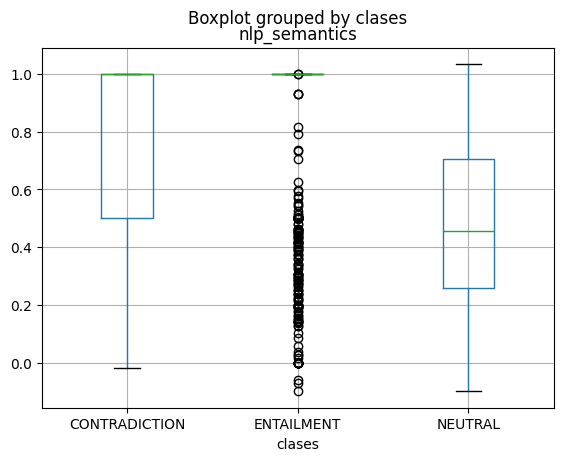

In [24]:
train.boxplot(by="clases",column=["nlp_semantics"])

In [25]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [26]:
train_m.idxmin()

relation                     contradiction
no_matcheadas                  overlap_ent
contradiction                     relation
distancias                          mutinf
entropia_total                      list_m
entropias                       distancias
jaccard                           mearts_t
simBoW                            mearts_t
mutinf                          distancias
mearts                           semantics
max_info                     no_matcheadas
sumas                        no_matcheadas
semantics                       distancias
nlp_semantics          entropia_relaciones
mutinf_t                          mearts_t
mearts_t                          mutinf_t
max_info_t                        mearts_t
sumas_t                      no_matcheadas
entail                 entropia_relaciones
contra                              entail
neutral                             entail
no_match                            mutinf
rel_conceptuales                    entail
list_comp  

In [27]:
train_m.min()

relation              -0.884141
no_matcheadas         -0.944366
contradiction         -0.884141
distancias            -0.986464
entropia_total        -0.233364
entropias             -0.818237
jaccard               -0.809039
simBoW                -0.882336
mutinf                -0.986464
mearts                -0.844830
max_info              -0.857078
sumas                 -0.684841
semantics             -0.966176
nlp_semantics         -0.807222
mutinf_t              -0.917260
mearts_t              -0.917260
max_info_t            -0.888594
sumas_t               -0.644886
entail                -0.868094
contra                -0.349948
neutral               -0.574833
no_match              -0.845412
rel_conceptuales      -0.556921
list_comp             -0.593177
diferencias           -0.746998
list_incomp           -0.326291
entropia_relaciones   -0.868094
list_M                -0.454960
list_m                -0.847015
list_T                -0.455834
Jaro-Winkler_rit      -0.687420
KL_diver

<Axes: >

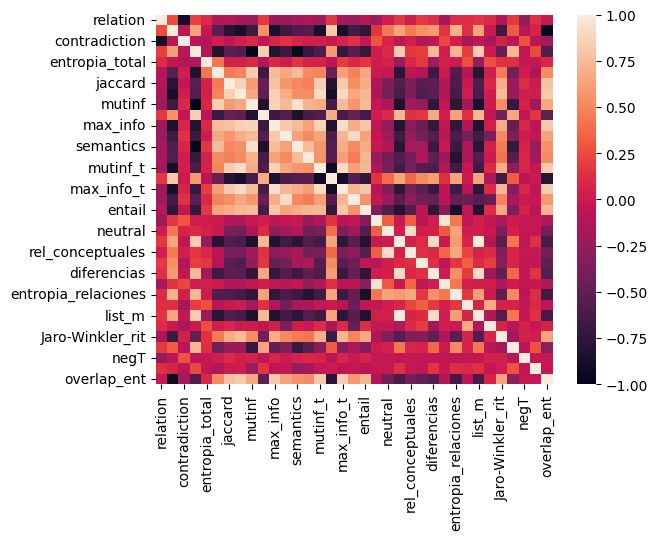

In [28]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [29]:
train_m

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,list_incomp,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent
relation,1.000000,0.251385,-0.884141,0.205519,0.099374,-0.124234,-0.095925,-0.194819,-0.219099,0.167553,...,-0.182852,0.107557,0.111964,0.146804,0.100731,-0.147468,0.169722,-0.257405,0.119272,-0.017081
no_matcheadas,0.251385,1.000000,-0.065050,0.620023,-0.034071,-0.525283,-0.796045,-0.873400,-0.685991,0.541818,...,0.142770,0.695945,0.125879,0.644679,-0.011066,-0.687420,0.305776,-0.085993,0.059330,-0.944366
contradiction,-0.884141,-0.065050,1.000000,-0.085461,-0.123618,0.022316,-0.048434,0.038090,0.087847,-0.052797,...,0.229748,0.034195,-0.182334,-0.039511,-0.162674,0.042963,-0.072176,0.267540,-0.077526,-0.200172
distancias,0.205519,0.620023,-0.085461,1.000000,-0.119254,-0.818237,-0.528534,-0.571615,-0.986464,0.849074,...,0.027439,0.727942,0.191094,0.834797,-0.007359,-0.475630,0.723635,-0.056842,0.234722,-0.586418
entropia_total,0.099374,-0.034071,-0.123618,-0.119254,1.000000,0.422565,0.050500,0.045131,0.088893,-0.113993,...,0.032461,0.001576,0.259748,-0.233364,0.262038,0.138335,0.124710,-0.024688,-0.042113,0.079649
entropias,-0.124234,-0.525283,0.022316,-0.818237,0.422565,1.000000,0.449100,0.490487,0.833196,-0.675268,...,-0.004815,-0.577316,-0.091560,-0.794858,0.038434,0.446735,-0.417585,0.023802,-0.126594,0.519032
jaccard,-0.095925,-0.796045,-0.048434,-0.528534,0.050500,0.449100,1.000000,0.856852,0.596207,-0.467824,...,-0.108835,-0.591437,-0.015061,-0.580769,0.080155,0.678665,-0.237102,0.106775,0.003750,0.788460
simBoW,-0.194819,-0.873400,0.038090,-0.571615,0.045131,0.490487,0.856852,1.000000,0.650056,-0.501804,...,-0.123779,-0.640592,0.013151,-0.628876,0.010617,0.747603,-0.245004,0.032637,0.029105,0.827674
mutinf,-0.219099,-0.685991,0.087847,-0.986464,0.088893,0.833196,0.596207,0.650056,1.000000,-0.822037,...,-0.041167,-0.757157,-0.181286,-0.847015,0.004505,0.526043,-0.704871,0.061004,-0.206135,0.649006
mearts,0.167553,0.541818,-0.052797,0.849074,-0.113993,-0.675268,-0.467824,-0.501804,-0.822037,1.000000,...,0.022760,0.629420,0.132836,0.731740,-0.045942,-0.423840,0.641443,-0.057985,0.145505,-0.512581


# Procesamiento de caracteristicas y etiqueta

In [25]:
train

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases,entroG1,entroG2,entroG3
0,2,0.142857,0.000000,0.000000,2.418908,0.000000,0.857143,0.801784,0.000000,0.000000,...,0.000000,2.973557,4.676183,2.973557,4.676183,2.973557,NEUTRAL,2.418908,-2.257275,-2.257275
1,-1,0.375000,0.125000,0.000000,2.409212,0.000000,0.625000,0.668153,0.000000,0.000000,...,3.240224,2.840224,4.888358,0.000000,4.915581,3.240224,NEUTRAL,-0.831012,-2.479147,-2.506369
2,2,0.250000,0.000000,0.924640,2.220359,2.121928,0.750000,0.676123,4.007161,0.003346,...,3.321928,1.960964,4.399920,0.000000,4.399920,0.000000,ENTAILMENT,-1.101570,-2.179561,-2.179561
3,2,0.750000,0.000000,1.148936,2.315387,1.843752,0.375000,0.474342,3.987142,0.004614,...,4.218172,0.000000,4.702511,0.000000,4.647994,0.000000,NEUTRAL,-1.902785,-2.387123,-2.332606
4,-1,0.875000,0.125000,1.048510,2.228679,1.979147,0.250000,0.267261,3.924470,0.004802,...,4.174688,0.000000,4.613856,0.000000,4.599705,0.000000,NEUTRAL,-1.946009,-2.385176,-2.371025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,2,1.000000,0.000000,1.359216,2.003877,0.503258,0.166667,0.235702,3.900165,0.005255,...,3.406239,0.000000,4.011388,0.000000,3.283190,0.000000,NEUTRAL,-1.402362,-2.007511,-1.279313
4435,2,1.000000,0.000000,1.346294,2.081184,0.985228,0.000000,0.000000,3.824894,0.003925,...,3.553763,0.000000,3.886147,0.000000,3.721163,0.000000,NEUTRAL,-1.472579,-1.804962,-1.639978
4436,-1,1.000000,0.166667,1.130096,2.098866,1.918554,0.000000,0.000000,3.925221,0.004793,...,4.108695,2.750000,4.466211,0.000000,4.392591,0.000000,NEUTRAL,-2.009829,-2.367345,-2.293725
4437,2,0.666667,0.000000,1.298727,2.024862,1.224394,0.333333,0.235702,3.775651,0.004270,...,3.281036,0.000000,3.819583,0.000000,3.497375,2.503258,NEUTRAL,-1.256175,-1.794722,-1.472513


In [26]:
train.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'pInflexionV', 'entSimilitud', 'dicEntT', 'dicEntH',
       'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2', 'H_grupo3',
       'h_k_grupo3', 'clases', 'entroG1', 'entroG2', 'entroG3'],
      dtype='object')

In [27]:
train=train[['no_matcheadas','contradiction','simBoW','sumas','semantics','mutinf_t',
 'contra','rel_conceptuales','list_comp','diferencias','list_incomp',
 'entropia_relaciones','negH','overlap_ent','H_grupo1','h_k_grupo2','h_k_grupo3','clases']]

In [28]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [29]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    elif i == "NEUTRAL":
        y_train.append(2)
    else:
        y_train.append(0)

In [30]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

In [71]:
# train.hist(figsize=(20,10))
# plt.show()

# DEV

In [37]:
for i in range(5):
    if i==0:
        dev = pd.read_pickle('salida/nuevo4/SICK/DEV_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/SICK/DEV_'+str(i+1)+'.csv_.pickle')
            dev=pd.concat([dev,temp])
        except:
            print(i+1)

In [38]:
dev=dev.reset_index(drop=True)
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_DEV.csv")
dev["clases"]=temp1["entailment_label"]

In [13]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
dev["mutinf"]=dev["mutinf_t"]-dev["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
dev["max_info"]=dev["max_info_t"]-dev["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
dev["entropias"]=dev["entropia_total"]-dev["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
dev["sumas"]=dev["sumas_t"]-dev["sumas"]
dev["list_m"]=dev["list_m"]/dev["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]
dev

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,-1,0.200000,0.4,0.000000,1.978805,1.978805,0.333333,0.845154,4.727097,0.000000,...,0.000000,5,0.000000,7,0.904762,0.000000,0,0,0.400000,CONTRADICTION
1,2,0.833333,0.0,1.183096,2.094673,0.468858,0.250000,0.200000,0.293324,0.006208,...,0.918296,6,0.333333,6,0.466667,0.190519,0,0,0.166667,NEUTRAL
2,2,0.500000,0.0,1.237796,1.893345,1.171417,0.500000,0.288675,0.476009,0.005888,...,1.251629,6,0.166667,5,0.527778,0.784963,0,0,0.500000,NEUTRAL
3,2,1.000000,0.0,1.325890,2.498930,1.039782,0.000000,0.000000,0.012716,0.006564,...,1.521928,5,0.400000,3,0.361111,0.617125,0,0,0.000000,NEUTRAL
4,1,0.000000,0.0,0.000000,2.075304,2.075304,1.000000,1.000000,4.697862,0.000000,...,0.000000,5,0.000000,6,1.000000,0.000000,0,0,1.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2,1.000000,0.0,1.317034,2.188722,0.377444,0.000000,0.000000,0.028425,0.005737,...,0.918296,3,0.666667,4,0.361111,0.304323,0,0,0.000000,NEUTRAL
491,2,0.333333,0.0,0.000000,2.188722,2.188722,0.666667,0.577350,4.461859,0.000000,...,0.000000,3,0.000000,4,0.638889,0.000000,0,0,0.666667,NEUTRAL
492,2,1.000000,0.0,1.342304,0.979869,0.000000,0.000000,0.000000,0.000000,0.006133,...,0.000000,4,1.000000,3,0.000000,0.000000,0,0,0.000000,NEUTRAL
493,2,1.000000,0.0,1.379935,0.868393,0.057115,0.000000,0.000000,0.026470,0.004359,...,1.500000,4,0.250000,4,0.333333,0.413392,0,0,0.000000,NEUTRAL


In [39]:
dev[(dev["relation"]==1) & (dev["clases"]=="ENTAILMENT")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entSimilitud,dicEntT,dicEntH,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
13,1,0.0,0.0,0.0,2.382201,0.0,1.000,0.816497,0.0,0.0,...,0.693767,"{'hiker': '', 'top': '', 'mountain': '', 'do':...","{'hiker': '', 'top': '', 'mountain': '', 'danc...",0.000000,2.617492,4.267949,2.617492,4.267949,2.617492,ENTAILMENT
43,1,0.0,0.0,0.0,2.349625,0.0,1.000,1.000000,0.0,0.0,...,0.427060,"{'corndog': '', 'eat': 'be,be,', 'toddler': 't...","{'toddler': 'two', 'eat': 'be,,', 'corndog': '...",0.000000,3.521641,4.476222,3.521641,4.476222,3.521641,ENTAILMENT
61,1,0.0,0.0,0.0,2.464084,0.0,1.000,0.912871,0.0,0.0,...,0.921928,"{'woman': 'other', 'measure': 'be,,', 'other':...","{'woman': '', 'measure': 'be,be,'}",2.846439,0.000000,4.189898,0.000000,3.684184,1.921928,ENTAILMENT
71,1,0.0,0.0,0.0,1.990672,0.0,1.000,0.866025,0.0,0.0,...,0.772395,"{'man': '', 'play': 'be,,', 'electric': '', 'g...","{'man': '', 'play': 'be,,', 'guitar': ''}",0.000000,2.235926,3.493251,2.235926,3.493251,2.235926,ENTAILMENT
81,1,0.0,0.0,0.0,2.234105,0.0,1.000,0.912871,0.0,0.0,...,0.503258,"{'man': '', 'empty': 'be,,,completely,', 'cont...","{'man': '', 'empty': 'be,,', 'container': '', ...",0.000000,3.169925,4.154736,3.169925,4.154736,3.169925,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,1,0.0,0.0,0.0,2.327201,0.0,0.875,0.875000,0.0,0.0,...,0.533005,"{'man': '', 'motocross': '', 'uniform': '', 'w...","{'person': '', 'motocross': '', 'uniform': '',...",0.000000,3.418296,4.491769,3.418296,4.491769,3.418296,ENTAILMENT
415,1,0.0,0.0,0.0,2.309423,0.0,1.000,0.957427,0.0,0.0,...,0.516065,"{'girl': '', 'blue': '', 'sweater': 'blue', 'h...","{'girl': '', 'blue': '', 'sweater': 'blue', 'h...",0.000000,3.010434,4.584734,3.010434,4.584734,3.010434,ENTAILMENT
427,1,0.0,0.0,0.0,1.994306,0.0,1.000,0.912871,0.0,0.0,...,0.591673,"{'white': '', 'dog': 'two,white,', 'run': 'be,...","{'white': '', 'dog': 'two,white,', 'run': 'be,...",0.000000,2.807355,3.546465,2.807355,3.546465,2.807355,ENTAILMENT
456,1,0.0,0.0,0.0,2.252522,0.0,1.000,1.000000,0.0,0.0,...,0.946373,"{'skateboarder': '', 'jump': 'be', 'air': ''}","{'skateboarder': '', 'jump': 'be', 'air': ''}",0.000000,2.251629,3.602764,2.251629,3.602764,2.251629,ENTAILMENT


In [34]:
dev[(dev["relation"]==2) & (dev["clases"]=="NEUTRAL")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entSimilitud,dicEntT,dicEntH,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
1,2,0.833333,0.0,1.183096,2.230576,1.188376,0.166667,0.166667,3.703843,0.006208,...,0.349651,"{'person': '', 'black': '', 'jacket': 'black',...","{'skilled': '', 'person': 'skilled', 'ride': '...",2.721928,0.000000,4.365677,0.000000,4.365677,0.000000,NEUTRAL
2,2,0.500000,0.0,1.237796,2.147422,1.298795,0.500000,0.547723,3.867572,0.005888,...,0.534955,"{'child': 'four', 'do': 'be,,', 'backbend': ''...","{'girl': 'four', 'do': 'be,,,,', 'backbend': '...",2.780639,0.000000,4.259624,0.000000,4.309600,0.000000,NEUTRAL
3,2,1.000000,0.0,0.000000,2.344903,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.658351,"{'player': '', 'throw': 'be,,', 'ball': ''}","{'team': 'two', 'compete': 'be', 'football': '...",3.614369,2.584963,4.308208,0.000000,3.936243,2.251629,NEUTRAL
5,2,0.666667,0.0,1.268083,2.211749,1.520426,0.500000,0.462910,3.886036,0.005122,...,0.355307,"{'few': '', 'people': 'few', 'eat': 'be', 'red...","{'large': '', 'group': 'large', 'asian': '', '...",3.553509,2.751629,4.489037,0.000000,4.489037,0.000000,NEUTRAL
6,2,0.400000,0.0,0.970717,2.478481,1.277613,0.600000,0.600000,3.823187,0.004411,...,0.563547,"{'white': '', 'motorcycle': 'black', 'stand': ...","{'motorcycle': '', 'ride': 'be,,', 'stand': ''...",2.594907,0.000000,4.928086,0.000000,4.928086,0.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,2,1.000000,0.0,1.314977,2.285471,1.431560,0.000000,0.000000,3.726120,0.005737,...,0.388509,"{'biker': '', 'ride': 'be,away,', 'fence': ''}","{'man': '', 'dance': 'be', 'road': ''}",3.177566,2.807355,4.313191,0.000000,4.120272,2.807355,NEUTRAL
491,2,0.333333,0.0,0.000000,2.082194,0.000000,0.666667,0.577350,0.000000,0.000000,...,0.694805,"{'woman': '', 'play': 'be,,', 'electric': '', ...","{'kid': '', 'play': 'be,,', 'guitar': ''}",0.000000,2.235926,3.807436,2.235926,3.807436,2.235926,NEUTRAL
492,2,1.000000,0.0,1.355017,1.931365,0.650022,0.000000,0.000000,3.849122,0.005328,...,0.481423,"{'animal': '', 'graze': 'be', 'grass': ''}","{'cop': '', 'sit': 'be', 'police': '', 'bike':...",3.031454,0.000000,3.531063,0.000000,3.355439,0.000000,NEUTRAL
493,2,1.000000,0.0,1.366943,2.077698,0.852405,0.000000,0.000000,3.832254,0.004554,...,0.413981,"{'dog': '', 'snap': 'be', 'droplet': '', 'wate...","{'girl': '', 'band': '', 'play': 'be,,', 'inst...",4.079513,0.000000,4.268621,0.000000,3.356785,0.000000,NEUTRAL


In [35]:
dev[(dev["relation"]==-1) & (dev["clases"]=="CONTRADICTION")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entSimilitud,dicEntT,dicEntH,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
0,-1,0.200000,0.400000,1.103723,2.060694,2.121928,0.800000,0.845154,3.982924,0.003991,...,0.651296,"{'young': '', 'boy': 'young', 'play': 'be,outd...","{'be': '', 'boy': 'no', 'play': 'outdoors', 'm...",3.746439,1.960964,4.035548,0.000000,3.913370,2.921928,CONTRADICTION
9,-1,0.333333,0.333333,0.000000,2.244250,0.000000,0.666667,0.666667,0.000000,0.000000,...,0.526617,"{'girl': 'no', 'white': '', 'dancing': 'white'}","{'girl': '', 'white': '', 'dance': 'be'}",0.000000,2.235926,4.126573,2.235926,4.126573,2.235926,CONTRADICTION
29,-1,0.000000,0.166667,0.000000,2.423844,0.000000,1.000000,0.925820,0.000000,0.000000,...,0.676976,"{'man': '', 'toss': 'be,not,,,', 'kid': '', 's...","{'man': '', 'toss': 'be,,', 'kid': '', 'swimmi...",0.000000,2.719295,4.599430,2.719295,4.599430,2.719295,CONTRADICTION
41,-1,0.000000,0.333333,1.175427,2.440469,1.792481,1.000000,1.000000,4.042556,0.004284,...,0.785235,"{'woman': '', 'kiss': 'be,be,', 'man': ''}","{'woman': 'no', 'kiss': 'be', 'man': ''}",3.084963,2.251629,3.618913,0.000000,3.317906,2.251629,CONTRADICTION
45,-1,0.000000,0.250000,1.103723,2.520363,2.231270,1.000000,1.000000,3.995885,0.003991,...,0.694263,"{'adult': '', 'amphitheater': '', 'talk': 'be'...","{'adult': 'no', 'amphitheater': '', 'talk': ''...",3.788755,2.049452,4.492708,0.000000,4.354784,2.913977,CONTRADICTION
52,-1,0.000000,0.333333,1.175427,2.333362,1.918296,1.000000,1.000000,4.019103,0.004499,...,0.793876,"{'woman': '', 'comb': 'be,,', 'hair': ''}","{'woman': 'no', 'comb': '', 'hair': ''}",3.725481,2.584963,3.829802,0.000000,3.444414,2.584963,CONTRADICTION
68,-1,0.000000,0.166667,1.103723,1.973270,2.054585,1.000000,0.866025,4.033464,0.004986,...,0.363847,"{'young': '', 'man': 'three,young,', 'run': 'b...","{'man': 'no', 'run': '', 'jump': '', 'kicking'...",3.573935,2.450826,4.186409,0.000000,4.163166,2.918296,CONTRADICTION
70,-1,0.000000,0.250000,0.000000,2.374722,0.000000,1.000000,0.894427,0.000000,0.000000,...,0.959567,"{'man': '', 'stir': 'be,not,,,', 'sauce': '', ...","{'man': '', 'stir': 'be,,', 'sauce': '', 'chic...",0.000000,2.750000,3.557069,2.750000,3.557069,2.750000,CONTRADICTION
73,-1,0.000000,0.250000,0.000000,2.025533,0.000000,1.000000,0.912871,0.000000,0.000000,...,0.669325,"{'boy': 'three', 'karate': '', 'costume': '', ...","{'boy': 'three', 'karate': '', 'costume': '', ...",0.000000,2.750000,3.622449,2.750000,3.622449,2.750000,CONTRADICTION
77,-1,0.000000,0.250000,0.000000,2.201475,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.543564,"{'snake': '', 'feed': 'be,be,,,', 'mouse': '',...","{'snake': 'no', 'feed': 'be,be,,,', 'mouse': '...",2.235926,2.521641,3.670023,0.000000,3.525311,2.235926,CONTRADICTION


In [40]:
dev=dev[['no_matcheadas','contradiction','simBoW','sumas','semantics','mutinf_t',
 'contra','rel_conceptuales','list_comp','diferencias','list_incomp',
 'entropia_relaciones','negH','overlap_ent','H_grupo1','h_k_grupo2','h_k_grupo3','clases']]

In [41]:
X_d = dev.drop(['clases'],axis=1)
y_d = dev['clases']

In [42]:
# SICK
y_dev=[]
for i in y_d:
    if i == "ENTAILMENT":
        y_dev.append(1)
    elif i == "NEUTRAL":
        y_dev.append(2)
    else:
        y_dev.append(0)

In [43]:
scaler = preprocessing.MaxAbsScaler().fit(X_d)
X_scaled = scaler.transform(X_d)
X_dev = X_scaled

# TEST

In [33]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/nuevo4/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            print(i+1)

In [34]:
test=test.reset_index(drop=True)
temp1 = pd.read_csv("../OPENAI/data/SICK/original/SICK_TEST.csv")
test["clases"]=temp1["entailment_label"]

In [23]:
#train["mutinfx"]=train["mutinf"]/train["mutinf_t"]
test["mutinf"]=test["mutinf_t"]-test["mutinf"]
#train["max_infox"]=train["max_info"]/train["max_info_t"]
test["max_info"]=test["max_info_t"]-test["max_info"]
#train["mearts"]=train["mearts"]/train["mearts_t"]
#train["entropiasx"]=train["entropias"]/train["entropia_total"]
test["entropias"]=test["entropia_total"]-test["entropias"]
#train["sumasx"]=train["sumas"]/train["sumas_t"]
test["sumas"]=test["sumas_t"]-test["sumas"]
test["list_m"]=test["list_m"]/test["list_M"]
#train["list_mxx"]=train["list_M"]-train["list_m"]
test

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,entropia_relaciones,list_M,list_m,list_T,Jaro-Winkler_rit,KL_divergence,negT,negH,overlap_ent,clases
0,-1,0.750000,0.125,1.346791,2.089354,1.118403,0.000000,0.316228,0.219389,0.005862,...,1.500000,8,0.250000,5,0.491667,0.428036,0,0,0.125000,NEUTRAL
1,2,0.800000,0.000,1.327605,2.017728,0.753919,0.666667,0.428571,0.362200,0.005729,...,0.863121,7,0.285714,7,0.589286,0.249111,0,0,0.200000,NEUTRAL
2,-1,0.800000,0.200,1.344318,1.950857,0.855943,0.333333,0.285714,0.274363,0.005747,...,0.863121,7,0.285714,7,0.507937,0.412795,0,0,0.000000,NEUTRAL
3,1,0.000000,0.000,0.000000,1.881168,1.881168,1.000000,0.925820,4.683008,0.000000,...,0.000000,7,0.000000,8,0.952381,0.000000,0,0,1.000000,ENTAILMENT
4,2,0.142857,0.000,1.360140,1.610893,0.625665,0.833333,0.833333,0.596417,0.006914,...,0.591673,7,0.142857,7,0.822222,0.277387,0,0,0.857143,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,-1,0.750000,0.250,1.289382,1.919241,0.548290,0.250000,0.223607,0.376250,0.004805,...,1.500000,4,0.250000,5,0.483333,0.475319,0,0,0.000000,NEUTRAL
4902,2,1.000000,0.000,1.400464,1.578898,0.856970,0.000000,0.000000,0.088624,0.005584,...,1.500000,4,0.250000,5,0.344444,0.439648,0,0,0.000000,NEUTRAL
4903,2,1.000000,0.000,1.283513,0.747585,0.204020,0.000000,0.000000,0.015651,0.006004,...,1.521928,5,0.400000,4,0.000000,0.201834,0,0,0.000000,NEUTRAL
4904,2,1.000000,0.000,1.307751,1.392618,0.193725,0.000000,0.000000,0.033260,0.006552,...,1.298795,8,0.625000,6,0.420635,0.080018,0,0,0.000000,NEUTRAL


In [35]:
test[(test["relation"]==1) & (test["clases"]=="ENTAILMENT")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,TextoL,HipotesisL,pInflexion,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
3,1,0.0,0.0,0.0,1.752139,0.0,1.000000,0.925820,0.0,0.0,...,"[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...","[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...",2,0.0,3.000000,3.522178,3.000000,3.522178,3.000000,ENTAILMENT
9,1,0.0,0.0,0.0,1.793315,0.0,0.833333,0.800000,0.0,0.0,...,"[a{a,DET}, person{person,NOUN}, in{in,ADP}, a{...","[a{a,DET}, man{man,NOUN}, in{in,ADP}, a{a,DET}...",1,0.0,2.251629,3.066721,2.251629,3.066721,2.251629,ENTAILMENT
12,1,0.0,0.0,0.0,2.357544,0.0,1.000000,0.894427,0.0,0.0,...,"[a{a,DET}, skilled{skilled,ADJ}, person{person...","[a{a,DET}, person{person,NOUN}, is{be,AUX}, ri...",0,0.0,2.584963,3.332915,2.584963,3.332915,2.584963,ENTAILMENT
17,1,0.0,0.0,0.0,2.624726,0.0,1.000000,0.925820,0.0,0.0,...,"[the{the,DET}, game{game,NOUN}, of{of,ADP}, ba...","[a{a,DET}, man{man,NOUN}, with{with,ADP}, a{a,...",0,0.0,2.807355,3.415661,2.807355,3.415661,2.807355,ENTAILMENT
30,1,0.0,0.0,0.0,1.991120,0.0,0.800000,0.800000,0.0,0.0,...,"[kids{kid,NOUN}, in{in,ADP}, red{red,ADJ}, shi...","[children{child,NOUN}, in{in,ADP}, red{red,ADJ...",1,0.0,1.370951,3.239080,1.370951,3.239080,1.370951,ENTAILMENT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4739,1,0.0,0.0,0.0,1.796089,0.0,1.000000,1.000000,0.0,0.0,...,"[a{a,DET}, shirtless{shirtless,ADJ}, man{man,N...","[a{a,DET}, shirtless{shirtless,ADJ}, man{man,N...",0,0.0,2.584963,3.419382,2.584963,3.419382,2.584963,ENTAILMENT
4744,1,0.0,0.0,0.0,2.082444,0.0,1.000000,0.900000,0.0,0.0,...,"[a{a,DET}, little{little,ADJ}, girl{girl,NOUN}...","[a{a,DET}, little{little,ADJ}, girl{girl,NOUN}...",2,0.0,2.725481,3.845505,2.725481,3.845505,2.725481,ENTAILMENT
4765,1,0.0,0.0,0.0,2.369571,0.0,1.000000,1.000000,0.0,0.0,...,"[a{a,DET}, motorcycle{motorcycle,NOUN}, racer{...","[the{the,DET}, motorcycle{motorcycle,NOUN}, ra...",1,0.0,2.584963,3.530493,2.584963,3.530493,2.584963,ENTAILMENT
4770,1,0.0,0.0,0.0,2.154024,0.0,1.000000,1.000000,0.0,0.0,...,"[a{a,DET}, woman{woman,NOUN}, is{be,AUX}, wear...","[the{the,DET}, woman{woman,NOUN}, is{be,AUX}, ...",0,0.0,2.947703,3.813831,2.947703,3.813831,2.947703,ENTAILMENT


In [36]:
test[(test["relation"]==2) & (test["clases"]=="NEUTRAL")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,TextoL,HipotesisL,pInflexion,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
1,2,0.800000,0.0,1.327605,2.013069,1.295836,0.600000,0.428571,3.855514,0.005729,...,"[a{a,DET}, group{group,NOUN}, of{of,ADP}, boys...","[the{the,DET}, young{young,ADJ}, boys{boy,NOUN...",2,2.378783,0.000000,3.991735,0.0,3.991735,0.000000,NEUTRAL
4,2,0.142857,0.0,1.360140,1.593572,0.863121,0.857143,0.833333,3.978109,0.006914,...,"[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...","[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...",1,1.556657,2.807355,3.354606,0.0,3.354606,0.000000,NEUTRAL
6,2,0.666667,0.0,1.333763,1.451908,1.000000,0.333333,0.235702,3.873665,0.007486,...,"[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...","[there{there,PRON}, is{be,VERB}, no{no,DET}, d...",0,2.645593,0.000000,3.308751,0.0,3.308751,0.000000,NEUTRAL
7,2,0.875000,0.0,1.322217,1.334282,0.954434,0.125000,0.218218,3.807339,0.005081,...,"[two{two,NUM}, dogs{dog,NOUN}, are{be,AUX}, wr...","[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...",2,2.855389,0.000000,3.338711,0.0,3.292842,0.000000,NEUTRAL
8,2,0.857143,0.0,1.310395,1.371232,0.811278,0.142857,0.235702,3.864435,0.004804,...,"[two{two,NUM}, dogs{dog,NOUN}, are{be,AUX}, wr...","[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...",1,2.000000,0.000000,3.315411,0.0,3.315411,0.000000,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4900,2,1.000000,0.0,1.374292,1.158223,0.413817,0.000000,0.000000,3.857349,0.006235,...,"[a{a,DET}, cheetah{cheetah,NOUN}, is{be,AUX}, ...","[a{a,DET}, white{white,ADJ}, and{and,CCONJ}, b...",1,2.459148,0.000000,3.288320,0.0,3.288320,0.000000,NEUTRAL
4902,2,1.000000,0.0,1.400464,1.054016,0.000000,0.000000,0.000000,3.681429,0.005584,...,"[a{a,DET}, dog{dog,NOUN}, in{in,ADP}, a{a,DET}...","[the{the,DET}, flute{flute,NOUN}, is{be,AUX}, ...",0,1.770951,1.921928,2.460964,0.0,2.463458,1.370951,NEUTRAL
4903,2,1.000000,0.0,1.283513,0.747585,0.543564,0.000000,0.000000,3.682235,0.006004,...,"[a{a,DET}, boy{boy,NOUN}, is{be,AUX}, happily{...","[a{a,DET}, white{white,ADJ}, bird{bird,NOUN}, ...",1,2.355389,0.000000,2.558872,0.0,2.524397,0.000000,NEUTRAL
4904,2,1.000000,0.0,1.307751,1.418564,1.435592,0.000000,0.000000,3.814937,0.006552,...,"[the{the,DET}, girl{girl,NOUN}, who{who,PRON},...","[two{two,NUM}, people{people,NOUN}, wearing{we...",0,3.742590,0.000000,3.776754,0.0,3.793240,0.000000,NEUTRAL


In [37]:
test[(test["relation"]==-1) & (test["clases"]=="CONTRADICTION")]

,relation,no_matcheadas,contradiction,distancias,entropia_total,entropias,jaccard,simBoW,mutinf,mearts,...,TextoL,HipotesisL,pInflexion,H_grupo1,h_k_grupo1,H_grupo2,h_k_grupo2,H_grupo3,h_k_grupo3,clases
10,-1,0.0,0.166667,0.0,1.793315,0.0,0.833333,0.800000,0.0,0.0,...,"[there{there,PRON}, is{be,VERB}, no{no,DET}, m...","[a{a,DET}, person{person,NOUN}, in{in,ADP}, a{...",2,0.0,2.251629,3.066721,2.251629,3.066721,2.251629,CONTRADICTION
13,-1,0.2,0.200000,0.0,2.503702,0.0,0.800000,0.866025,0.0,0.0,...,"[nobody{nobody,PRON}, is{be,AUX}, riding{ride,...","[a{a,DET}, person{person,NOUN}, is{be,AUX}, ri...",2,2.0,2.000000,3.184184,0.000000,2.750000,2.000000,CONTRADICTION
16,-1,0.0,0.200000,0.0,2.669043,0.0,1.000000,0.912871,0.0,0.0,...,"[a{a,DET}, man{man,NOUN}, with{with,ADP}, a{a,...","[there{there,PRON}, is{be,VERB}, no{no,DET}, m...",0,0.0,2.584963,3.349255,2.584963,3.349255,2.584963,CONTRADICTION
38,-1,0.0,0.200000,0.0,1.362898,0.0,1.000000,1.000000,0.0,0.0,...,"[two{two,NUM}, children{child,NOUN}, are{be,AU...","[there{there,PRON}, is{be,VERB}, no{no,DET}, c...",0,0.0,2.251629,3.244414,2.251629,3.244414,2.251629,CONTRADICTION
69,-1,0.0,0.200000,0.0,1.978689,0.0,1.000000,1.000000,0.0,0.0,...,"[a{a,DET}, person{person,NOUN}, is{be,AUX}, we...","[there{there,PRON}, is{be,VERB}, no{no,DET}, p...",0,0.0,2.321928,2.679080,2.321928,2.679080,2.321928,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,-1,0.0,0.200000,0.0,1.921662,0.0,1.000000,0.894427,0.0,0.0,...,"[a{a,DET}, cluster{cluster,NOUN}, of{of,ADP}, ...","[there{there,PRON}, is{be,VERB}, no{no,DET}, d...",0,0.0,2.807355,3.418589,2.807355,3.418589,2.807355,CONTRADICTION
4680,-1,0.0,0.142857,0.0,2.350504,0.0,1.000000,1.000000,0.0,0.0,...,"[two{two,NUM}, race{race,NOUN}, cars{car,NOUN}...","[no{no,DET}, race{race,NOUN}, car{car,NOUN}, i...",0,0.0,3.000000,4.007127,3.000000,4.007127,3.000000,CONTRADICTION
4693,-1,0.0,0.333333,0.0,1.554585,0.0,1.000000,0.866025,0.0,0.0,...,"[a{a,DET}, brown{brown,ADJ}, dog{dog,NOUN}, is...","[no{no,DET}, dog{dog,NOUN}, is{be,AUX}, runnin...",0,0.0,2.000000,2.355389,2.000000,2.355389,2.000000,CONTRADICTION
4699,-1,0.0,0.166667,0.0,1.792481,0.0,1.000000,1.000000,0.0,0.0,...,"[the{the,DET}, lady{lady,NOUN}, is{be,AUX}, ho...","[there{there,PRON}, is{be,VERB}, no{no,DET}, l...",0,0.0,2.584963,3.044110,2.584963,3.044110,2.584963,CONTRADICTION


In [38]:
test.columns

Index(['relation', 'no_matcheadas', 'contradiction', 'distancias',
       'entropia_total', 'entropias', 'jaccard', 'simBoW', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'entail', 'contra', 'neutral',
       'no_match', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'list_M', 'list_m', 'list_T',
       'Jaro-Winkler_rit', 'KL_divergence', 'negT', 'negH', 'overlap_ent',
       'relacionesEncontradas', 'Texto', 'Hipotesis', 'TextoL', 'HipotesisL',
       'pInflexion', 'H_grupo1', 'h_k_grupo1', 'H_grupo2', 'h_k_grupo2',
       'H_grupo3', 'h_k_grupo3', 'clases'],
      dtype='object')

In [39]:
test=test[['no_matcheadas','contradiction','simBoW','sumas','semantics','mutinf_t',
 'contra','rel_conceptuales','list_comp','diferencias','list_incomp',
 'entropia_relaciones','negH','overlap_ent','H_grupo1','h_k_grupo2','h_k_grupo3','clases']]

In [40]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [41]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    elif i == "NEUTRAL":
        y_test.append(2)
    else:
        y_test.append(0)

In [42]:
y_test.count(1)

1404

In [43]:
y_test.count(0)

712

In [44]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

In [44]:
X_test.shape

(4900, 17)

# MODELO DE REGRESIÓN LÓGISTICA

In [44]:
X_train = np.where(np.isnan(X_train), 0, X_train)
X_train

array([[0.14285714, 0.        , 0.80178373, ..., 0.        , 0.7177886 ,
        0.7177886 ],
       [0.375     , 0.125     , 0.6681531 , ..., 0.64666739, 0.        ,
        0.78215942],
       [0.25      , 0.        , 0.6761234 , ..., 0.66297349, 0.        ,
        0.        ],
       ...,
       [1.        , 0.16666667, 0.        , ..., 0.81999241, 0.        ,
        0.        ],
       [0.66666667, 0.        , 0.23570226, ..., 0.65481248, 0.        ,
        0.60426289],
       [1.        , 0.        , 0.        , ..., 0.71824946, 0.        ,
        0.        ]])

In [45]:
X_train.shape

(4439, 17)

In [46]:
model = LogisticRegression(penalty="l2", C=1,solver='lbfgs',max_iter=700)

In [47]:
model.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=700)

# Selección de caracter+ísticas

In [87]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Use RFE to select the top 10 features
rfe = RFE(model, n_features_to_select=15,step=1,verbose=1)
#model.fit(X_train,y_train)


In [88]:
# Print the selected features
rfe.fit(train.drop(["clases"],axis=1),y_train)

ValueError: could not convert string to float: ' Generalidad: group-group |  Generalidad: kid-boy |  Generalidad: yard-yard |  Generalidad: play-play |  Generalidad: man-man |  Generalidad: stand-stand |  Generalidad: background-background | '

In [63]:
rfe.get_feature_names_out()

array(['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW',
       'sumas', 'mutinf_t', 'max_info_t', 'entail', 'list_comp',
       'list_incomp', 'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype=object)

In [64]:
rfe.get_params()

{'estimator__C': 1,
 'estimator__class_weight': None,
 'estimator__dual': False,
 'estimator__fit_intercept': True,
 'estimator__intercept_scaling': 1,
 'estimator__l1_ratio': None,
 'estimator__max_iter': 700,
 'estimator__multi_class': 'auto',
 'estimator__n_jobs': None,
 'estimator__penalty': 'l2',
 'estimator__random_state': None,
 'estimator__solver': 'lbfgs',
 'estimator__tol': 0.0001,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': LogisticRegression(C=1, max_iter=700),
 'importance_getter': 'auto',
 'n_features_to_select': 15,
 'step': 1,
 'verbose': 1}

In [65]:
rfe.predict_log_proba(test.drop(["clases"],axis=1))

array([[-3.09940908e+00, -4.74025428e+00, -5.53142677e-02],
       [-5.48577505e+00, -2.14683678e+00, -1.28968706e-01],
       [-3.68502357e+00, -4.32454119e+00, -3.90903763e-02],
       ...,
       [-8.21783874e+00, -5.83459231e+00, -3.19952590e-03],
       [-7.49177113e+00, -6.06357411e+00, -2.88789272e-03],
       [-7.23919286e+00, -6.00032508e+00, -3.20095508e-03]])

In [66]:
# segunda opción
#array(['no_matcheadas', 'contradiction', 'jaccard', 'simBoW', 'sumas',
#       'semantics', 'nlp_semantics', 'mutinf_t', 'max_info_t',
#       'diferencias', 'list_m', 'Jaro-Winkler_rit', 'negT', 'negH',
#       'overlap_ent'], dtype=object)

In [67]:
# primera opción
# [['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW','sumas','mutinf_t','max_info_t',
#  'entail','list_comp','list_incomp','Jaro-Winkler_rit','negT','negH','overlap_ent']]

In [68]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 700,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [69]:
model.decision_function(X_train)

array([[-2.00125696,  1.41274749,  0.58850948],
       [ 0.37287468, -0.97155885,  0.59868417],
       [-1.87808044,  1.04545871,  0.83262173],
       ...,
       [-2.17477448, -1.40188024,  3.57665472],
       [-2.88438247, -0.09487136,  2.97925382],
       [-3.27534632, -1.48983612,  4.76518244]])

In [70]:
labels=train.columns[:-1]
labels

Index(['relation', 'no_matcheadas', 'contradiction', 'jaccard', 'simBoW',
       'sumas', 'mutinf_t', 'max_info_t', 'entail', 'list_comp', 'list_incomp',
       'Jaro-Winkler_rit', 'negT', 'negH', 'overlap_ent'],
      dtype='object')

In [71]:
model.classes_

array([0, 1, 2])

In [72]:
model.coef_[0]

array([-0.88736822, -2.23178702,  0.73741204, -1.45229786,  3.45612313,
        0.73213001,  0.16454041, -1.49015246,  0.10984528, -1.63227362,
       -0.39666827,  1.68551065,  1.38137148,  2.66041457, -3.00046197])

In [73]:
coeficientes=model.coef_[0]

In [74]:
coeficientes

array([-0.88736822, -2.23178702,  0.73741204, -1.45229786,  3.45612313,
        0.73213001,  0.16454041, -1.49015246,  0.10984528, -1.63227362,
       -0.39666827,  1.68551065,  1.38137148,  2.66041457, -3.00046197])

In [75]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  4 simBoW 14 overlap_ent


In [76]:
n_columns=train.shape[1]-1

In [77]:
n_columns

15

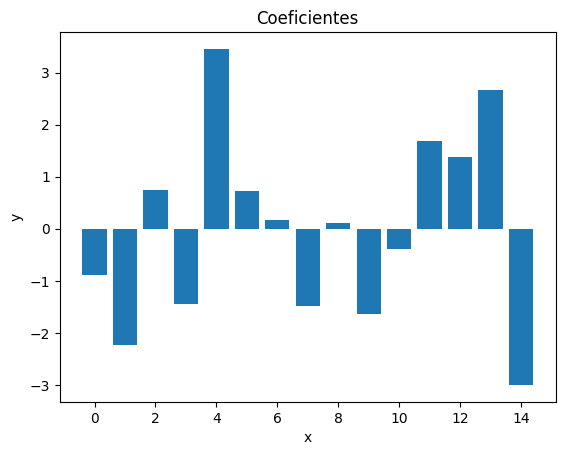

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

# prueba

In [48]:
X_dev = np.where(np.isnan(X_dev), 0, X_dev)
X_dev

array([[0.2       , 0.4       , 0.84515425, ..., 0.76026613, 0.        ,
        0.77198758],
       [0.83333333, 0.        , 0.16666667, ..., 0.55236174, 0.        ,
        0.        ],
       [0.5       , 0.        , 0.54772256, ..., 0.56427597, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.61517386, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.82785679, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.72297348, 0.        ,
        0.        ]])

In [49]:
X_test = np.where(np.isnan(X_test), 0, X_test)
X_test

array([[0.75      , 0.125     , 0.31622777, ..., 0.85795067, 0.        ,
        0.        ],
       [0.8       , 0.        , 0.42857143, ..., 0.54833915, 0.        ,
        0.        ],
       [0.8       , 0.2       , 0.28571429, ..., 0.57526748, 0.        ,
        0.        ],
       ...,
       [1.        , 0.        , 0.        , ..., 0.54294633, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.86271338, 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.68348687, 0.        ,
        0.        ]])

In [50]:
X_test.shape

(4906, 17)

In [49]:
predictionsdev = model.predict(X_dev)

In [50]:
dev["predictions"]=predictionsdev
dev

,no_matcheadas,contradiction,simBoW,sumas,semantics,mutinf_t,contra,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,negH,overlap_ent,H_grupo1,h_k_grupo2,h_k_grupo3,clases,predictions
0,0.200000,0.4,0.845154,0.155000,0.324887,4.555201,0.0,1,7,0.100000,0,0.986427,0,0.400000,3.746439,0.000000,2.921928,CONTRADICTION,0
1,0.833333,0.0,0.166667,0.060500,0.461058,4.249110,0.0,0,7,0.200000,0,0.764205,0,0.166667,2.721928,0.000000,0.000000,NEUTRAL,2
2,0.500000,0.0,0.547723,0.062500,0.378546,4.310911,0.0,1,6,0.125000,0,1.061278,0,0.500000,2.780639,0.000000,0.000000,NEUTRAL,2
3,1.000000,0.0,0.000000,0.000000,1.000000,4.017448,0.0,3,5,0.000000,0,0.954434,0,0.000000,3.614369,0.000000,2.251629,NEUTRAL,2
4,0.000000,0.0,0.912871,0.000000,1.000000,4.727021,0.0,0,8,0.000000,0,0.000000,0,1.000000,0.000000,2.446439,2.446439,NEUTRAL,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,1.000000,0.0,0.000000,0.050714,0.319342,4.084478,0.0,1,4,0.285714,0,1.378783,0,0.000000,3.177566,0.000000,2.807355,NEUTRAL,2
491,0.333333,0.0,0.577350,0.000000,1.000000,4.575238,0.0,0,5,0.000000,0,0.000000,0,0.666667,0.000000,2.235926,2.235926,NEUTRAL,1
492,1.000000,0.0,0.000000,0.029444,0.142203,4.213244,0.0,1,4,0.500000,0,1.405639,0,0.000000,3.031454,0.000000,0.000000,NEUTRAL,2
493,1.000000,0.0,0.000000,0.025556,0.340495,4.005504,0.0,4,2,0.222222,0,1.500000,0,0.000000,4.079513,0.000000,0.000000,NEUTRAL,2


In [51]:
print(confusion_matrix(y_dev, predictionsdev,labels=[1,2,0]))

[[107  36   0]
 [ 40 236   5]
 [  6  14  51]]


In [53]:
print("acccuracy: ",round(accuracy_score(y_dev,predictionsdev),2))
print("precision: ",round(precision_score(y_dev,predictionsdev,average="weighted"),2))
print("recall",round(recall_score(y_dev,predictionsdev,average="weighted"),2))
print("f1_score: ",round(f1_score(y_dev,predictionsdev,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_dev,predictionsdev),2))

acccuracy:  0.8
precision:  0.8
recall 0.8
f1_score:  0.8
matthews_score:  0.64


In [52]:
predictions = model.predict(X_test)

In [53]:
test["predictions"]=predictions
test

,no_matcheadas,contradiction,simBoW,sumas,semantics,mutinf_t,contra,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,negH,overlap_ent,H_grupo1,h_k_grupo2,h_k_grupo3,clases,predictions
0,0.750000,0.125,0.316228,0.058000,0.487727,4.041253,0.0,2,4,0.400000,0,1.500000,0,0.125000,3.721928,0.0,0.000000,NEUTRAL,2
1,0.800000,0.000,0.428571,0.055714,0.144630,4.217714,0.0,0,5,0.285714,0,0.863121,0,0.200000,2.378783,0.0,0.000000,NEUTRAL,2
2,0.800000,0.200,0.285714,0.057857,0.122308,4.088408,0.0,0,5,0.285714,0,0.863121,0,0.000000,2.495603,0.0,0.000000,NEUTRAL,2
3,0.000000,0.000,0.925820,0.000000,1.000000,4.683008,0.0,0,7,0.000000,0,0.000000,0,1.000000,0.000000,3.0,3.000000,ENTAILMENT,1
4,0.142857,0.000,0.833333,0.034286,0.162637,4.574526,0.0,0,6,0.142857,0,0.591673,0,0.857143,1.556657,0.0,0.000000,NEUTRAL,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.750000,0.250,0.223607,0.062000,0.283690,4.076415,0.0,2,1,0.200000,0,1.500000,0,0.000000,2.606239,0.0,1.370951,NEUTRAL,2
4902,1.000000,0.000,0.000000,0.006000,0.238630,3.770053,0.0,1,2,0.200000,0,1.500000,0,0.000000,1.770951,0.0,1.370951,NEUTRAL,2
4903,1.000000,0.000,0.000000,0.052500,0.049110,3.697886,0.0,1,2,0.500000,0,1.521928,0,0.000000,2.355389,0.0,0.000000,NEUTRAL,2
4904,1.000000,0.000,0.000000,0.082000,0.569738,3.848196,0.0,1,2,0.833333,0,1.298795,0,0.000000,3.742590,0.0,0.000000,NEUTRAL,2


In [54]:
test[(test["clases"]=="ENTAILMENT") & (test["predictions"]==1)]

,no_matcheadas,contradiction,simBoW,sumas,semantics,mutinf_t,contra,rel_conceptuales,list_comp,diferencias,list_incomp,entropia_relaciones,negH,overlap_ent,H_grupo1,h_k_grupo2,h_k_grupo3,clases,predictions
3,0.000000,0.0,0.925820,0.0,1.0,4.683008,0.0,0,7,0.0,0,0.000000,0,1.000000,0.000000,3.000000,3.000000,ENTAILMENT,1
9,0.000000,0.0,0.800000,0.0,1.0,4.567073,0.0,0,6,0.0,0,0.000000,0,1.000000,0.000000,2.251629,2.251629,ENTAILMENT,1
12,0.000000,0.0,0.894427,0.0,1.0,4.754943,0.0,0,5,0.0,0,0.000000,0,1.000000,0.000000,2.584963,2.584963,ENTAILMENT,1
17,0.000000,0.0,0.925820,0.0,1.0,4.682331,0.0,0,6,0.0,0,0.000000,0,1.000000,0.000000,2.807355,2.807355,ENTAILMENT,1
18,0.166667,0.0,0.771517,0.0,1.0,4.517777,0.0,1,5,0.0,0,0.650022,0,0.833333,2.807355,0.000000,2.807355,ENTAILMENT,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4769,0.250000,0.0,0.750000,0.0,1.0,4.569281,0.0,0,4,0.0,0,0.000000,0,0.750000,0.000000,2.000000,2.000000,ENTAILMENT,1
4770,0.000000,0.0,1.000000,0.0,1.0,4.691275,0.0,0,9,0.0,0,0.000000,0,1.000000,0.000000,2.947703,2.947703,ENTAILMENT,1
4775,0.166667,0.0,0.730297,0.0,1.0,4.607248,0.0,0,7,0.0,0,0.000000,0,0.833333,0.000000,1.548795,1.548795,ENTAILMENT,1
4777,0.000000,0.0,1.000000,0.0,1.0,4.752382,0.0,0,6,0.0,0,0.000000,0,1.000000,0.000000,2.584963,2.584963,ENTAILMENT,1


array([<Axes: title={'center': 'h_k_grupo2'}, xlabel='clases'>,
       <Axes: title={'center': 'h_k_grupo3'}, xlabel='clases'>],
      dtype=object)

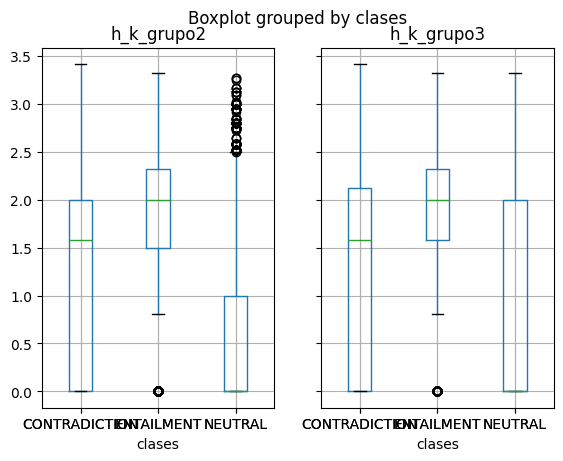

In [55]:
test.boxplot(by="clases",column=["h_k_grupo2","h_k_grupo3"])

In [56]:
test.columns

Index(['no_matcheadas', 'contradiction', 'simBoW', 'sumas', 'semantics',
       'mutinf_t', 'contra', 'rel_conceptuales', 'list_comp', 'diferencias',
       'list_incomp', 'entropia_relaciones', 'negH', 'overlap_ent', 'H_grupo1',
       'h_k_grupo2', 'h_k_grupo3', 'clases', 'predictions'],
      dtype='object')

<Axes: title={'center': 'entropia_relaciones'}, xlabel='clases'>

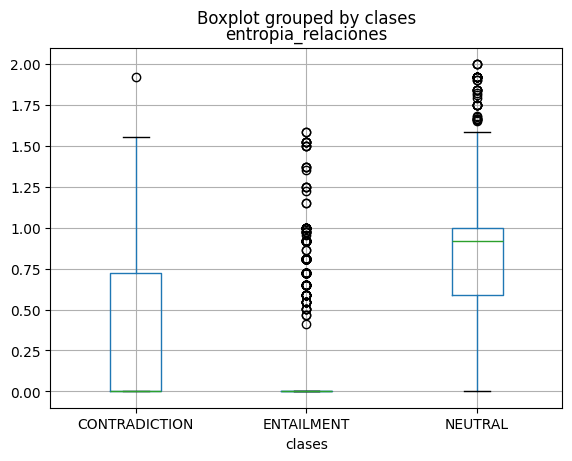

In [57]:
test.boxplot(by="clases",column=["entropia_relaciones"])

In [58]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[1089  313    2]
 [ 412 2328   50]
 [  58  125  529]]


In [49]:
print(confusion_matrix(y_test, predictions,labels=[1,2,0]))

[[1087  314    3]
 [ 416 2325   49]
 [  58  131  523]]


In [61]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.8
precision:  0.81
recall 0.8
f1_score:  0.81
matthews_score:  0.66


In [63]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.8
precision:  0.81
recall 0.8
f1_score:  0.81
matthews_score:  0.66


In [62]:
X_train.shape

(4439, 17)

In [63]:
X_test.shape

(4906, 17)

In [64]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [65]:
X_train_cv=X_cv
Y_train_cv=Y_cv

In [66]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.800000 (0.026473)
Logistic Regression Precision:: 0.810000 (0.026495)
Logistic Regression Recall:: 0.800000 (0.026473)
Logistic Regression F1-score:: 0.800000 (0.026578)


In [67]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.810000 (0.026853)
Logistic Regression Recall:: 0.780000 (0.030256)
Logistic Regression F1-score:: 0.790000 (0.028191)


In [68]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.800000 (0.026473)
Logistic Regression Recall:: 0.800000 (0.026473)
Logistic Regression F1-score:: 0.800000 (0.026473)


In [69]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.650000 (0.057265)


In [70]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [71]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))
print(confusion_matrix( y_test,y_predict,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       712
           1       0.70      0.78      0.74      1404
           2       0.84      0.83      0.84      2790

    accuracy                           0.80      4906
   macro avg       0.82      0.78      0.80      4906
weighted avg       0.81      0.80      0.81      4906

[[ 529   58  125]
 [   2 1089  313]
 [  50  412 2328]]


In [ ]:
    precision    recall  f1-score   support

           0       0.91      0.73      0.81       712
           1       0.70      0.77      0.73      1404
           2       0.84      0.83      0.84      2790

    accuracy                           0.80      4906
   macro avg       0.82      0.78      0.79      4906
weighted avg       0.81      0.80      0.80      4906

[[ 523   58  131]
 [   3 1087  314]
 [  49  416 2325]]

In [ ]:
#   precision    recall  f1-score   support

#            0       0.91      0.77      0.83       712
#            1       0.72      0.79      0.75      1404
#            2       0.85      0.84      0.85      2790

#     accuracy                           0.82      4906
#    macro avg       0.83      0.80      0.81      4906
# weighted avg       0.82      0.82      0.82      4906

# [[ 546   52  114]
#  [   3 1114  287]
#  [  54  383 2353]]

In [75]:
validation_size = 0.25
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)#,random_state=7
model.fit(X_train_cv,Y_train_cv)
predictionsVale = model.predict(X_validation_cv)
print("acccuracy: ",round(accuracy_score(Y_validation_cv,predictionsVale),2))
print("precision: ",round(precision_score(Y_validation_cv,predictionsVale,average="weighted"),2))
print("recall",round(recall_score(Y_validation_cv,predictionsVale,average="weighted"),2))
print("f1_score: ",round(f1_score(Y_validation_cv,predictionsVale,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(Y_validation_cv,predictionsVale),2))
print(confusion_matrix(Y_validation_cv,predictionsVale,labels=[2,1,0]))

acccuracy:  0.81
precision:  0.82
recall 0.81
f1_score:  0.81
matthews_score:  0.67
[[1099  201   26]
 [ 129  531    2]
 [  57   28  264]]


# Análisis adicional

In [76]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7),
      "solver": ['lbfgs']}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=500)
logreg_cv=GridSearchCV(logreg,grid,cv=10,verbose=1)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


tuned hpyerparameters :(best parameters)  {'C': 1.0, 'solver': 'lbfgs'}
accuracy : 0.8022131047526081


In [109]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'solver': 'lbfgs'}
accuracy : 0.805592499949159


In [110]:
predictions_grid=logreg_cv.predict(X_test)

In [111]:
print(confusion_matrix(y_test,predictions_grid))

[[ 539   58  115]
 [   4 1124  276]
 [  54  406 2330]]


In [112]:
from sklearn.model_selection import GridSearchCV 
from sklearn import svm
model = svm.SVC()   
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf'],
              'decision_function_shape': ['ovo','ovr']}  
  
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.776 total time=   0.8s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.753 total time=   0.8s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.831 total time=   0.8s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.812 total time=   0.8s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=1, kernel=rbf;, score=0.805 total time=   0.8s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.776 total time=   0.7s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.740 total time=   0.7s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.839 total time=   0.8s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=0.1, kernel=rbf;, score=0.809 total time=   0.7s
[CV 5/5] END

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
grid.best_params_

{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}

In [114]:
#{'C': 10, 'decision_function_shape': 'ovo', 'gamma': 1, 'kernel': 'rbf'}


In [115]:
grid.best_score_

0.8166265476299298

In [116]:
predictions_grid=grid.predict(X_test)

In [117]:
confusion_matrix(y_test,predictions_grid,labels=[0,1,2])

array([[ 526,   47,  139],
       [   3, 1109,  292],
       [  53,  337, 2400]])

In [118]:
print(classification_report(y_test, predictions_grid))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       712
           1       0.74      0.79      0.77      1404
           2       0.85      0.86      0.85      2790

    accuracy                           0.82      4906
   macro avg       0.83      0.80      0.81      4906
weighted avg       0.83      0.82      0.82      4906



In [119]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-2])
shap_values = explainer(X_test)

TypeError: The passed model is not callable and cannot be analyzed directly with the given masker! Model: SVC()

In [ ]:
test.columns

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'semantics2', 'entail', 'contra',
       'neutral', 'no_match', 'rel_conceptuales', 'entropia_relacionesNC',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'Jaro-Winkler_rit2',
       'KL_divergence', 'negT', 'negH', 'overlap_ent', 'meteor', 'meteor_t',
       'clases', 'predictions'],
      dtype='object')

In [ ]:
test.columns[:-2]

Index(['distancias', 'entropia_total', 'entropias', 'mutinf', 'mearts',
       'max_info', 'sumas', 'semantics', 'nlp_semantics', 'mutinf_t',
       'mearts_t', 'max_info_t', 'sumas_t', 'semantics2', 'entail', 'contra',
       'neutral', 'no_match', 'rel_conceptuales', 'entropia_relacionesNC',
       'list_comp', 'diferencias', 'list_incomp', 'entropia_relaciones',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'Jaro-Winkler_rit2',
       'KL_divergence', 'negT', 'negH', 'overlap_ent', 'meteor', 'meteor_t'],
      dtype='object')

In [ ]:
explainer.expected_value

array([-0.97658789, -0.00407925,  0.98066715])

In [ ]:
X_test

array([[0.78964869, 0.68306189, 0.35307294, ..., 0.        , 0.        ,
        0.27217093],
       [0.89238683, 0.65964568, 0.47736158, ..., 0.66666667, 0.        ,
        0.22967324],
       [0.92036796, 0.63778378, 0.40564367, ..., 0.33333333, 0.        ,
        0.13245248],
       ...,
       [0.89596724, 0.24440408, 0.29697785, ..., 0.        , 0.        ,
        0.1920561 ],
       [0.89826534, 0.45528147, 0.49213067, ..., 0.        , 0.        ,
        0.        ],
       [0.8957379 , 0.52617594, 0.58566445, ..., 0.        , 0.        ,
        0.03223319]])

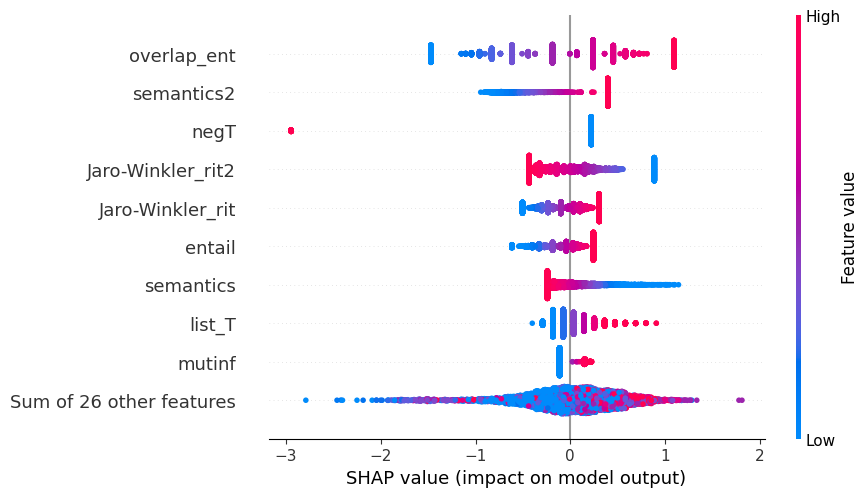

In [ ]:
shap.plots.beeswarm(shap_values[:,:,1])

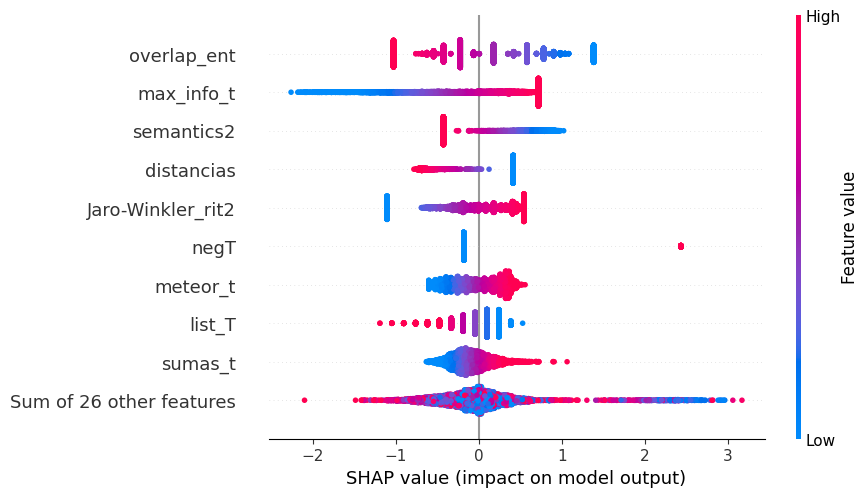

In [ ]:
shap.plots.beeswarm(shap_values[:,:,0])

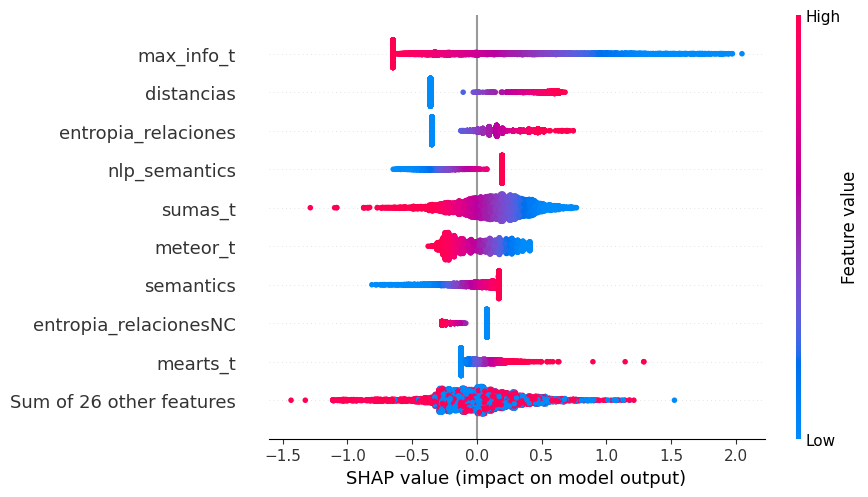

In [ ]:
shap.plots.beeswarm(shap_values[:,:,2])

In [ ]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.4751967  0.24555819 0.87544949 0.78537126 0.93112685 0.10731264
 0.47481402 0.25       0.0952381  0.         0.375      0.25
 0.4        0.83333333 0.         0.         0.25      ] 2 2


TypeError: In v0.20, force plot now requires the base value as the first parameter! Try shap.plots.force(explainer.expected_value, shap_values) or for multi-output models try shap.plots.force(explainer.expected_value[0], shap_values[0]).

In [ ]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.31428571 0.33333333 0.         0.66666667]


IndexError: index 1 is out of bounds for axis 2 with size 1

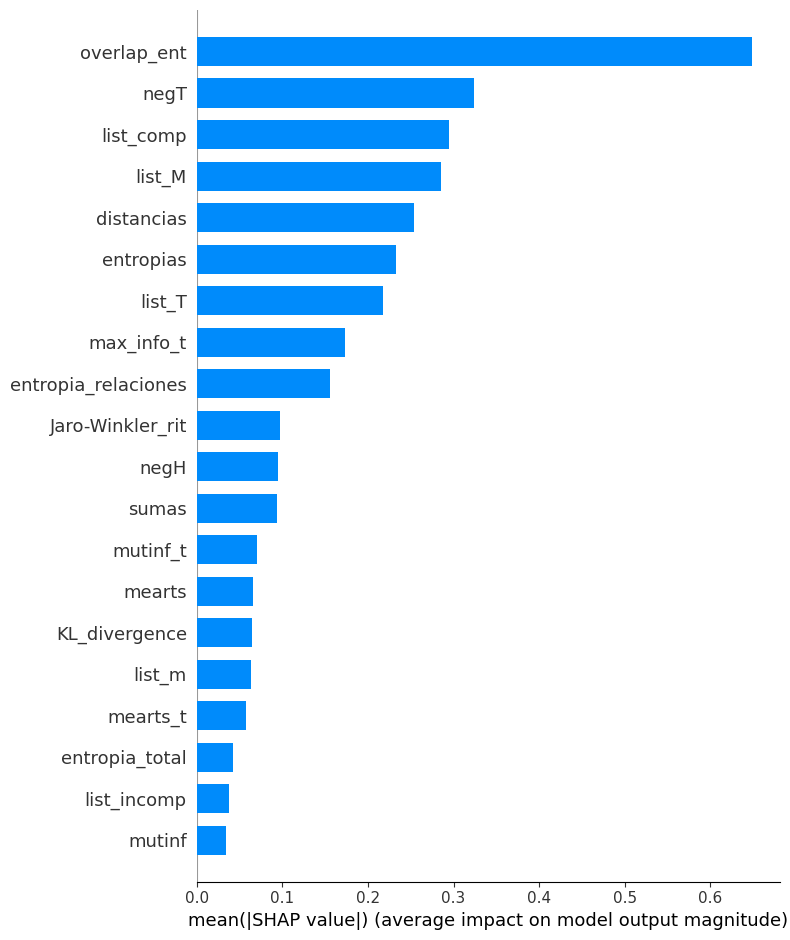

In [ ]:
shap.summary_plot(shap_values[:,:,1], X_test,plot_type="bar")

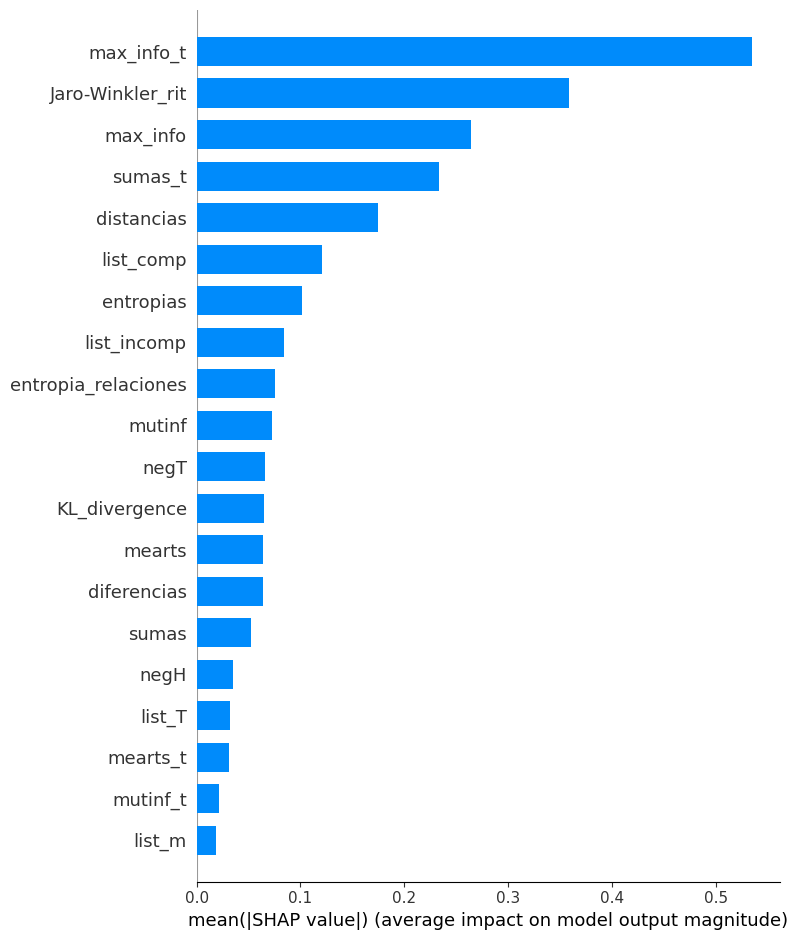

In [ ]:
shap.summary_plot(shap_values[:,:,2], X_test,plot_type="bar")

In [ ]:
X_test

array([[0.87330036, 0.68306189, 0.579461  , ..., 0.        , 0.        ,
        0.        ],
       [0.91316265, 0.65964568, 0.43449354, ..., 0.        , 0.        ,
        0.66666667],
       [0.9246584 , 0.63778378, 0.37642803, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.91400573, 0.24440408, 0.22985031, ..., 0.        , 0.        ,
        0.        ],
       [0.90080125, 0.45528147, 0.42378464, ..., 0.        , 0.        ,
        0.        ],
       [0.89284748, 0.52617594, 0.52618599, ..., 0.        , 0.        ,
        0.        ]])

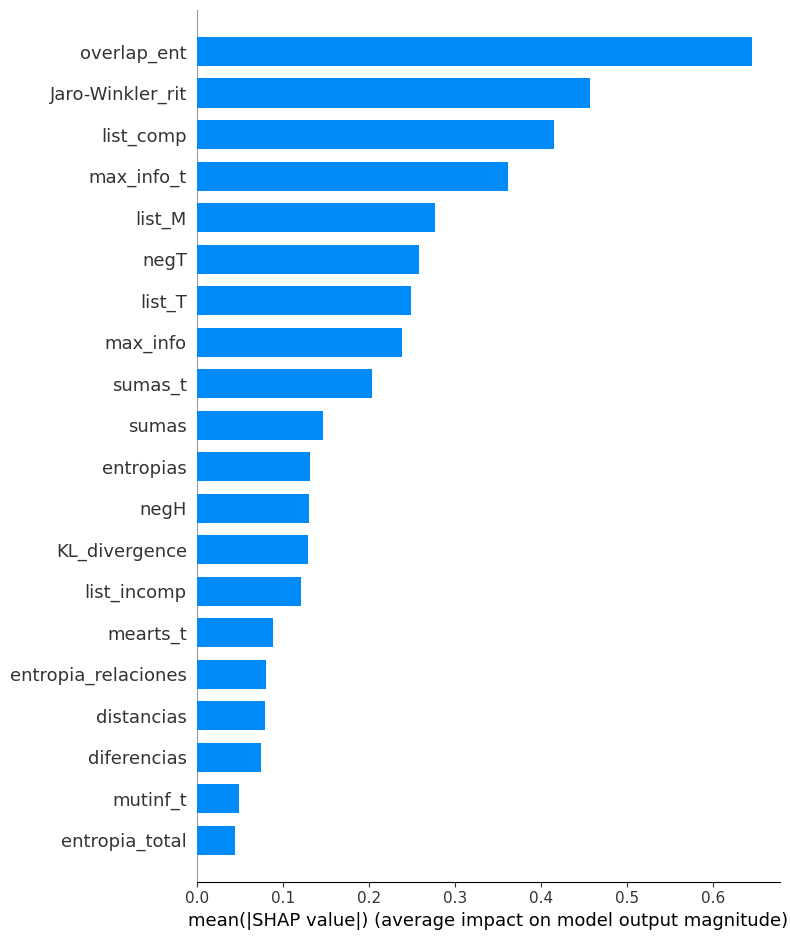

In [ ]:
shap.summary_plot(shap_values[:,:,0], X_test,plot_type="bar")

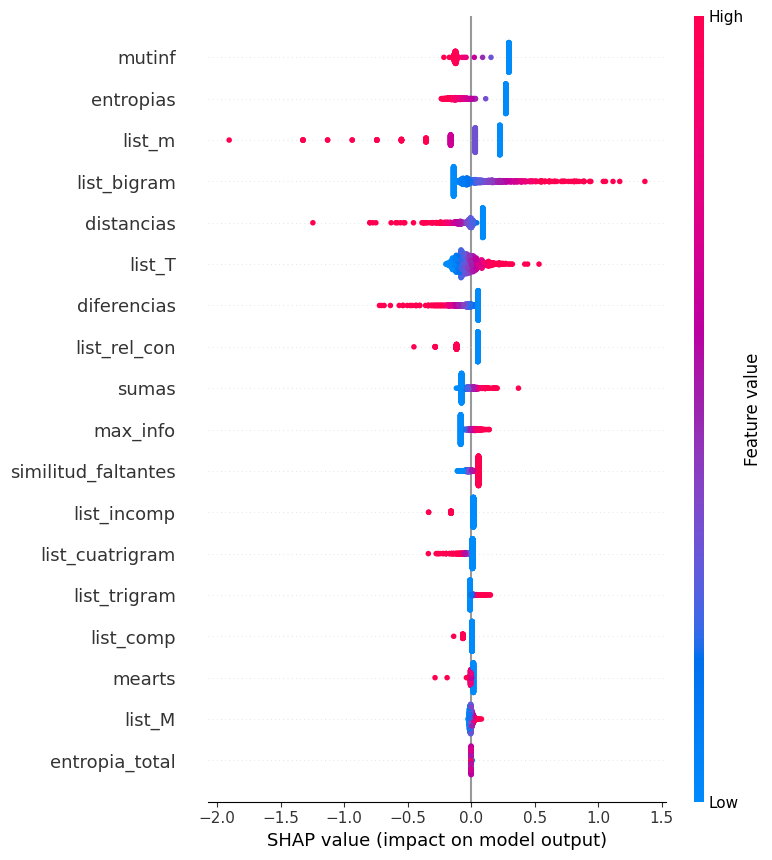

In [ ]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

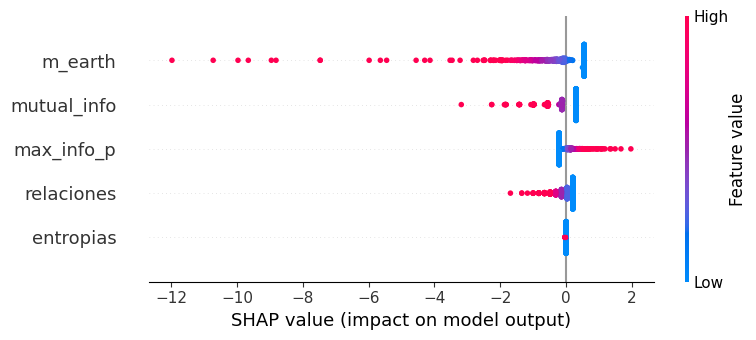

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

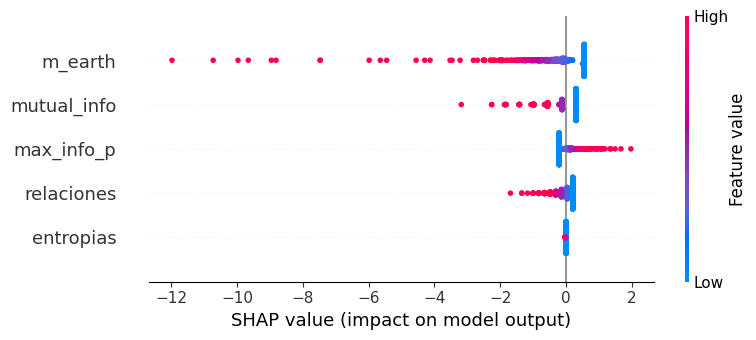

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [ ]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.67


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [ ]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.680000 (0.014004)
DecisionTree: 0.680000 (0.010178)
DecisionTree: 0.680000 (0.013535)
DecisionTree: 0.680000 (0.011671)


In [ ]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.680000 (0.015553)
DecisionTree: 0.580000 (0.018540)
DecisionTree: 0.580000 (0.016293)
DecisionTree: 0.580000 (0.019133)


In [ ]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred,labels=[1,2,0])

array([[ 860,  303,  241],
       [ 455, 2150,  185],
       [ 288,  158,  266]])

Profundidad del árbol: 23
Número de nodos terminales: 152


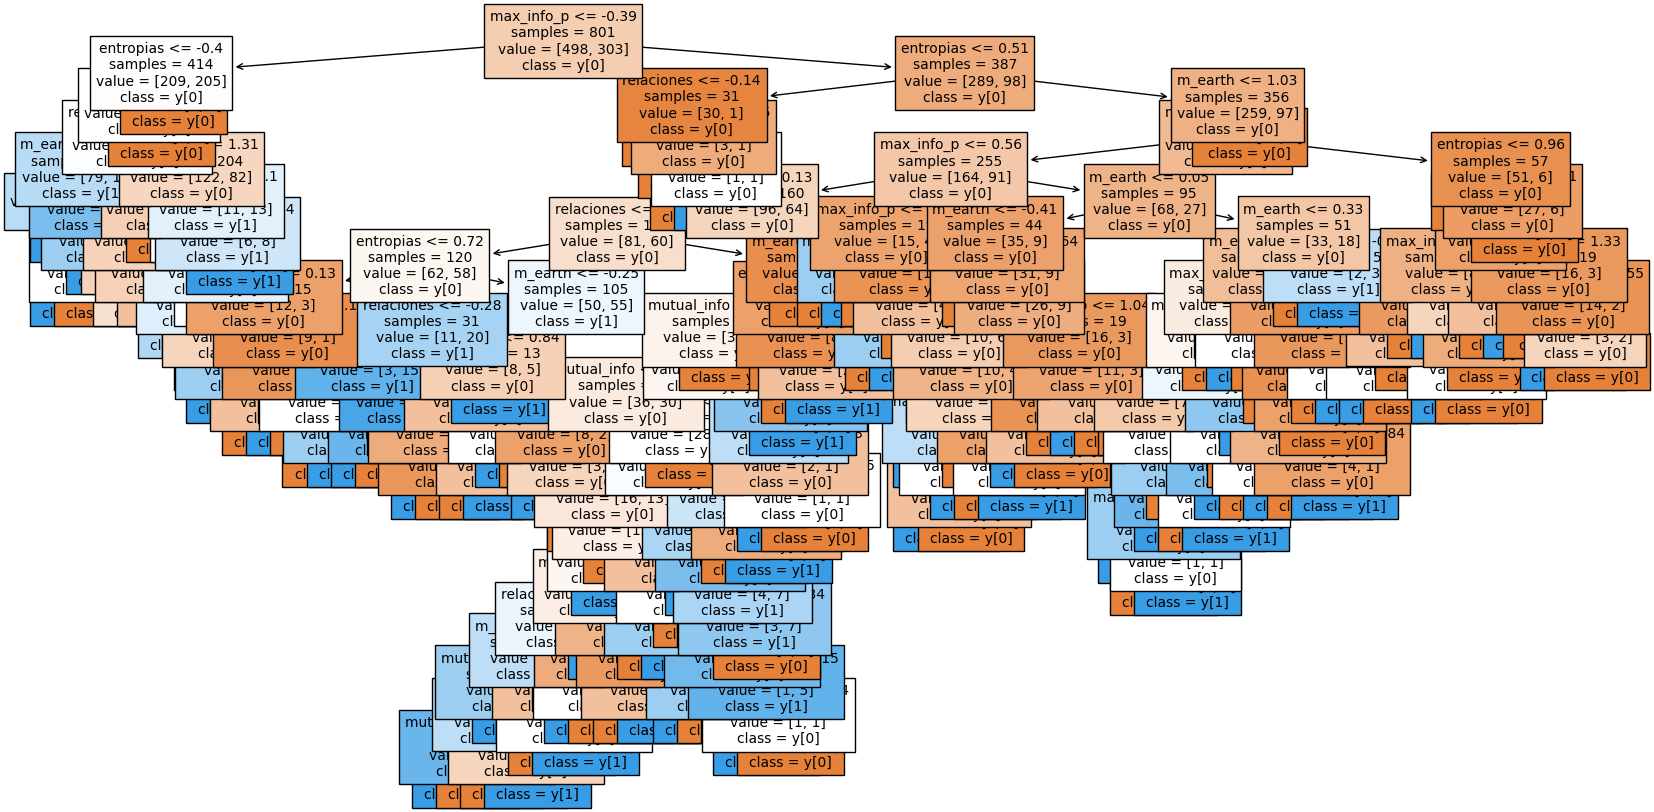

In [ ]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )